## Kabir's Code 

In [1]:
import pandas as pd

file_path = 'superstore_data.csv' 
data = pd.read_csv(file_path, encoding='ISO-8859-1')

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands, U.S.": "VI",
}

#Creating a column with StateAbbreviation using dictionary for visualizations
data['StateAbbrev'] = data['State'].map(us_state_to_abbrev)

#Selecting columns that are relevant
columns_of_interest = ['Region','State', 'Sales', 'Profit', 'StateAbbrev']  
relevant_data = data[columns_of_interest]

grouped_data_region = relevant_data.groupby('Region')[['Sales', 'Profit']].sum()
grouped_data_state = relevant_data.groupby('StateAbbrev')[['Sales','Profit']].sum()

#Sorting Sales
grouped_data_region_sorted = grouped_data_region.sort_values(by='Sales', ascending=False)
grouped_data_state_sorted = grouped_data_state.sort_values(by = 'Sales', ascending = False)

print(grouped_data_region_sorted)


               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


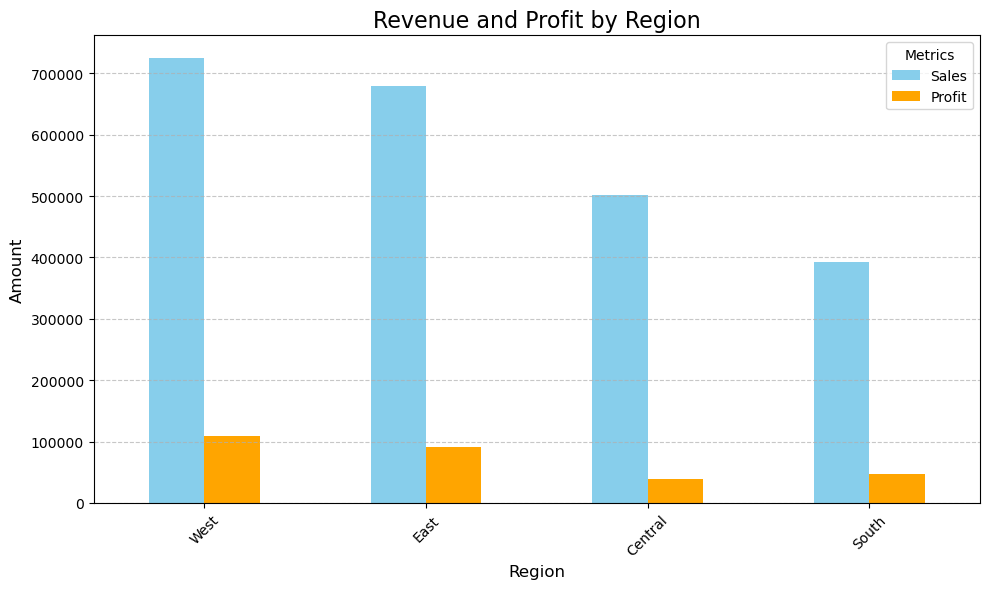

In [2]:
import matplotlib.pyplot as plt

#Plotting Revenue and Profit by Region

fig, ax = plt.subplots(figsize=(10, 6))

grouped_data_region_sorted.plot(kind='bar', ax=ax, color=['skyblue', 'orange'])

ax.set_title('Revenue and Profit by Region', fontsize=16)
ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Amount', fontsize=12)
ax.legend(title='Metrics', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)

plt.tight_layout()
plt.show()


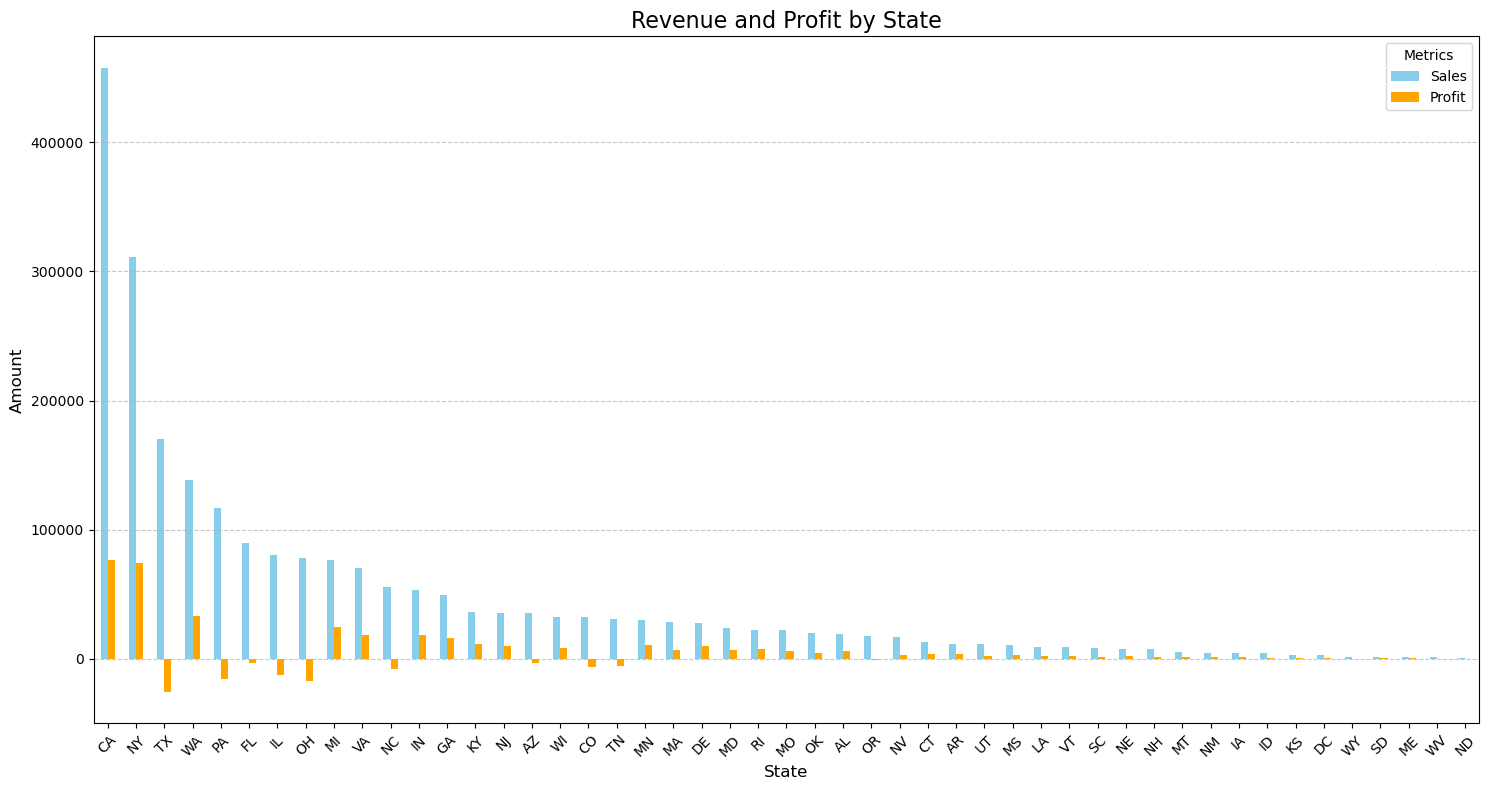

In [3]:

#Plotting by State
fig, ax = plt.subplots(figsize=(15, 8))

grouped_data_state_sorted.plot(kind='bar', ax=ax, color=['skyblue', 'orange'])

ax.set_title('Revenue and Profit by State', fontsize=16)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Amount', fontsize=12)
ax.legend(title='Metrics', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)

plt.tight_layout()
plt.show()


In [4]:
#Now differentiating sales and profit by cutomer segment 
customer_segment_data = data.groupby('Segment')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)

print(customer_segment_data)


                    Sales       Profit
Segment                               
Consumer     1.161401e+06  134119.2092
Corporate    7.061464e+05   91979.1340
Home Office  4.296531e+05   60298.6785


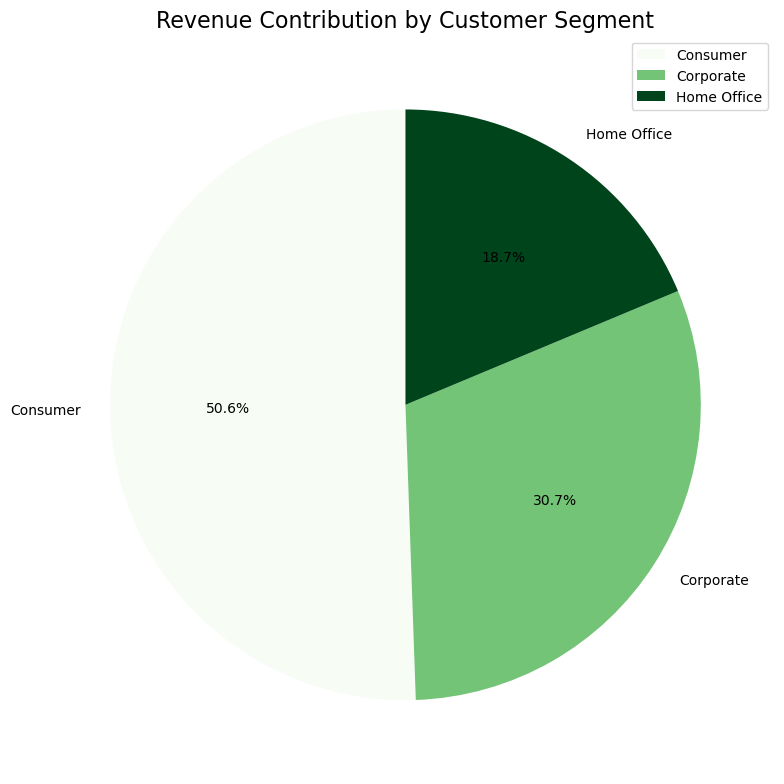

In [5]:
#Plotting as pie chart

fig, ax = plt.subplots(figsize=(8, 8))
customer_segment_data['Sales'].plot.pie(
    autopct='%1.1f%%', startangle=90, ax=ax, cmap='Greens', legend=True
)
ax.set_title('Revenue Contribution by Customer Segment', fontsize=16)
plt.ylabel('')  
plt.tight_layout()
plt.show()


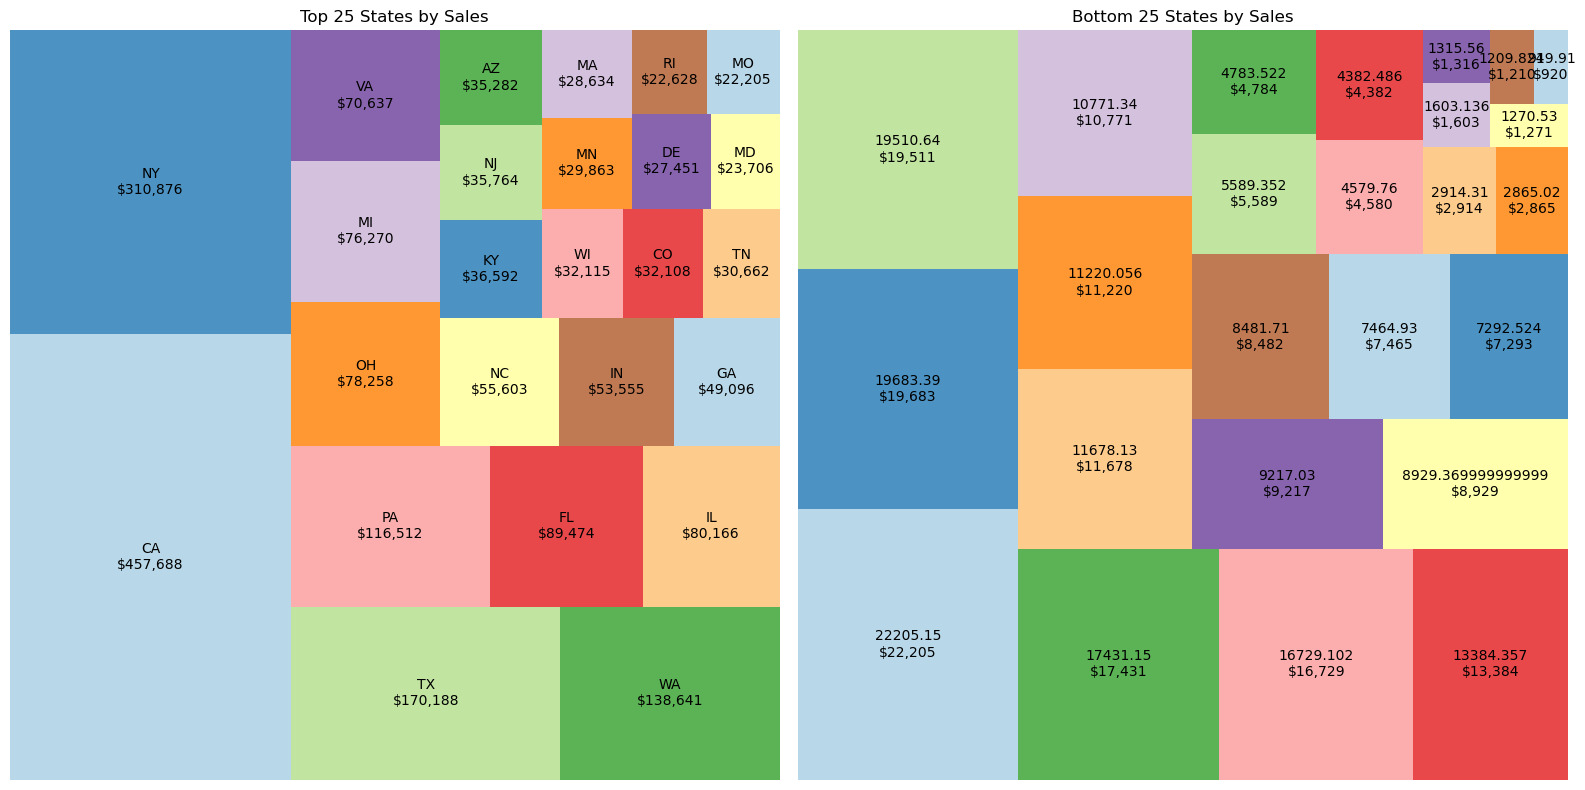

In [6]:
import squarify

#Using Squarify package to plot sales by state as a treemap

state_sales = data.groupby('StateAbbrev')['Sales'].sum().reset_index()
sorted_state_sales = state_sales.sort_values(by='Sales', ascending=False)

#Separating into two treemaps for clarity
top_25 = sorted_state_sales.head(25)

bottom_25 = sorted_state_sales.tail(25)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

labels_top = [f"{state}\n${sales:,.0f}" for state, sales in zip(top_25['StateAbbrev'], top_25['Sales'])]
squarify.plot(sizes=top_25['Sales'], label=labels_top, alpha=0.8, ax=axs[0], color=plt.cm.Paired.colors)
axs[0].set_title('Top 25 States by Sales')
axs[0].axis('off')

labels_bottom = [f"{state}\n${sales:,.0f}" for state, sales in zip(bottom_25['Sales'], bottom_25['Sales'])]
squarify.plot(sizes=bottom_25['Sales'], label=labels_bottom, alpha=0.8, ax=axs[1], color=plt.cm.Paired.colors)
axs[1].set_title('Bottom 25 States by Sales')
axs[1].axis('off')

plt.tight_layout()
plt.show()

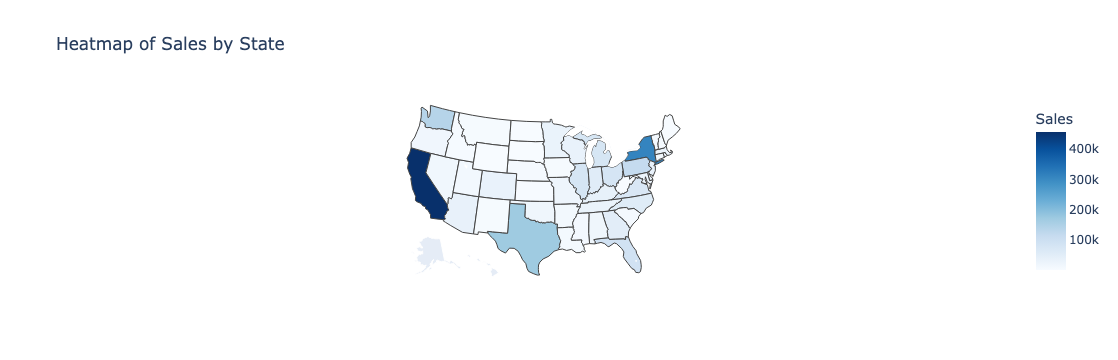

In [7]:
import plotly.express as px

#Using plotly express to generate a heatmap of sales by state
grouped_data_state_sorted = grouped_data_state_sorted.reset_index()


fig = px.choropleth(
    grouped_data_state_sorted,
    locations='StateAbbrev',
    locationmode='USA-states',
    color='Sales',
    color_continuous_scale='Blues',
    scope='usa',
    title='Heatmap of Sales by State'
)

fig.show()



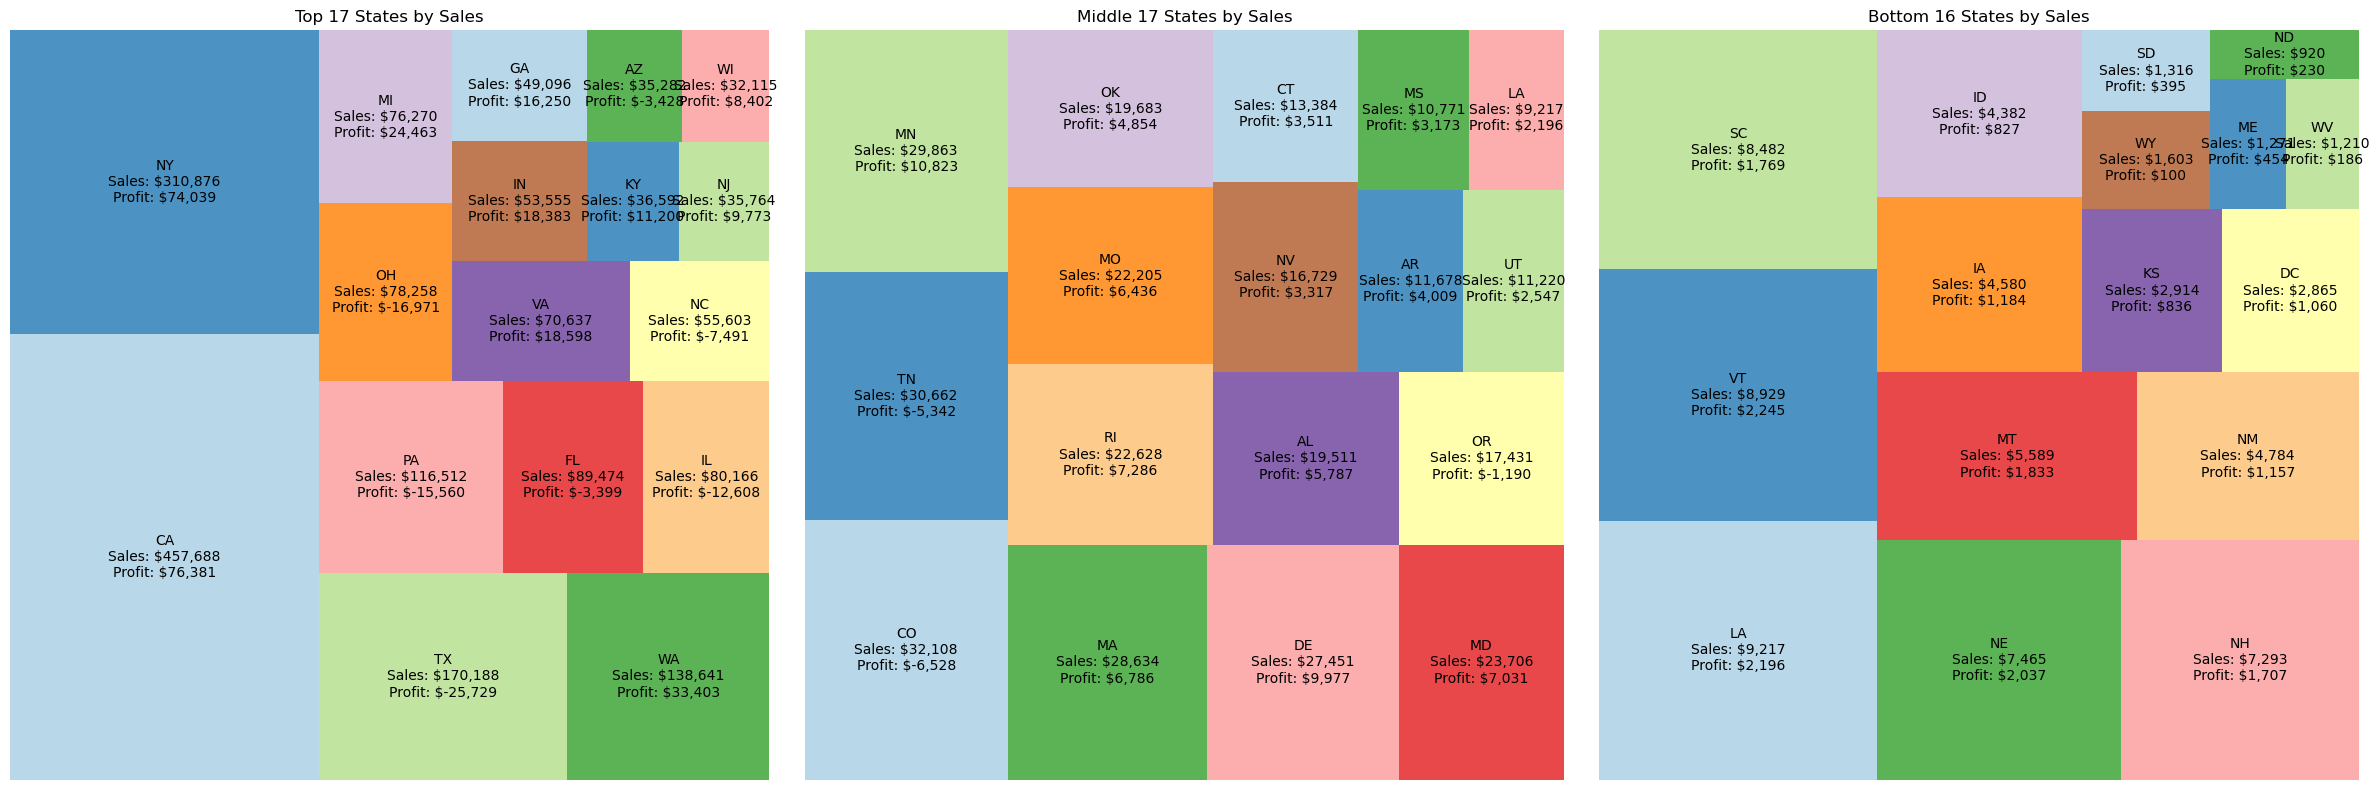

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

state_metrics = data.groupby('StateAbbrev')[['Sales', 'Profit']].sum().reset_index()

sorted_state_metrics = state_metrics.sort_values(by='Sales', ascending=False)

#Using squarify and generating three tree maps for calrity
top_17 = sorted_state_metrics.head(17)
middle_17 = sorted_state_metrics.iloc[17:34]
bottom_16 = sorted_state_metrics.tail(16)

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

labels_top = [
    f"{state}\nSales: ${sales:,.0f}\nProfit: ${profit:,.0f}"
    for state, sales, profit in zip(top_17['StateAbbrev'], top_17['Sales'], top_17['Profit'])
]
squarify.plot(
    sizes=top_17['Sales'], 
    label=labels_top, 
    alpha=0.8, 
    ax=axs[0], 
    color=plt.cm.Paired.colors
)
axs[0].set_title('Top 17 States by Sales')
axs[0].axis('off')

labels_middle = [
    f"{state}\nSales: ${sales:,.0f}\nProfit: ${profit:,.0f}"
    for state, sales, profit in zip(middle_17['StateAbbrev'], middle_17['Sales'], middle_17['Profit'])
]
squarify.plot(
    sizes=middle_17['Sales'], 
    label=labels_middle, 
    alpha=0.8, 
    ax=axs[1], 
    color=plt.cm.Paired.colors
)
axs[1].set_title('Middle 17 States by Sales')
axs[1].axis('off')

labels_bottom = [
    f"{state}\nSales: ${sales:,.0f}\nProfit: ${profit:,.0f}"
    for state, sales, profit in zip(bottom_16['StateAbbrev'], bottom_16['Sales'], bottom_16['Profit'])
]
squarify.plot(
    sizes=bottom_16['Sales'], 
    label=labels_bottom, 
    alpha=0.8, 
    ax=axs[2], 
    color=plt.cm.Paired.colors
)
axs[2].set_title('Bottom 16 States by Sales')
axs[2].axis('off')

plt.tight_layout()
plt.show()


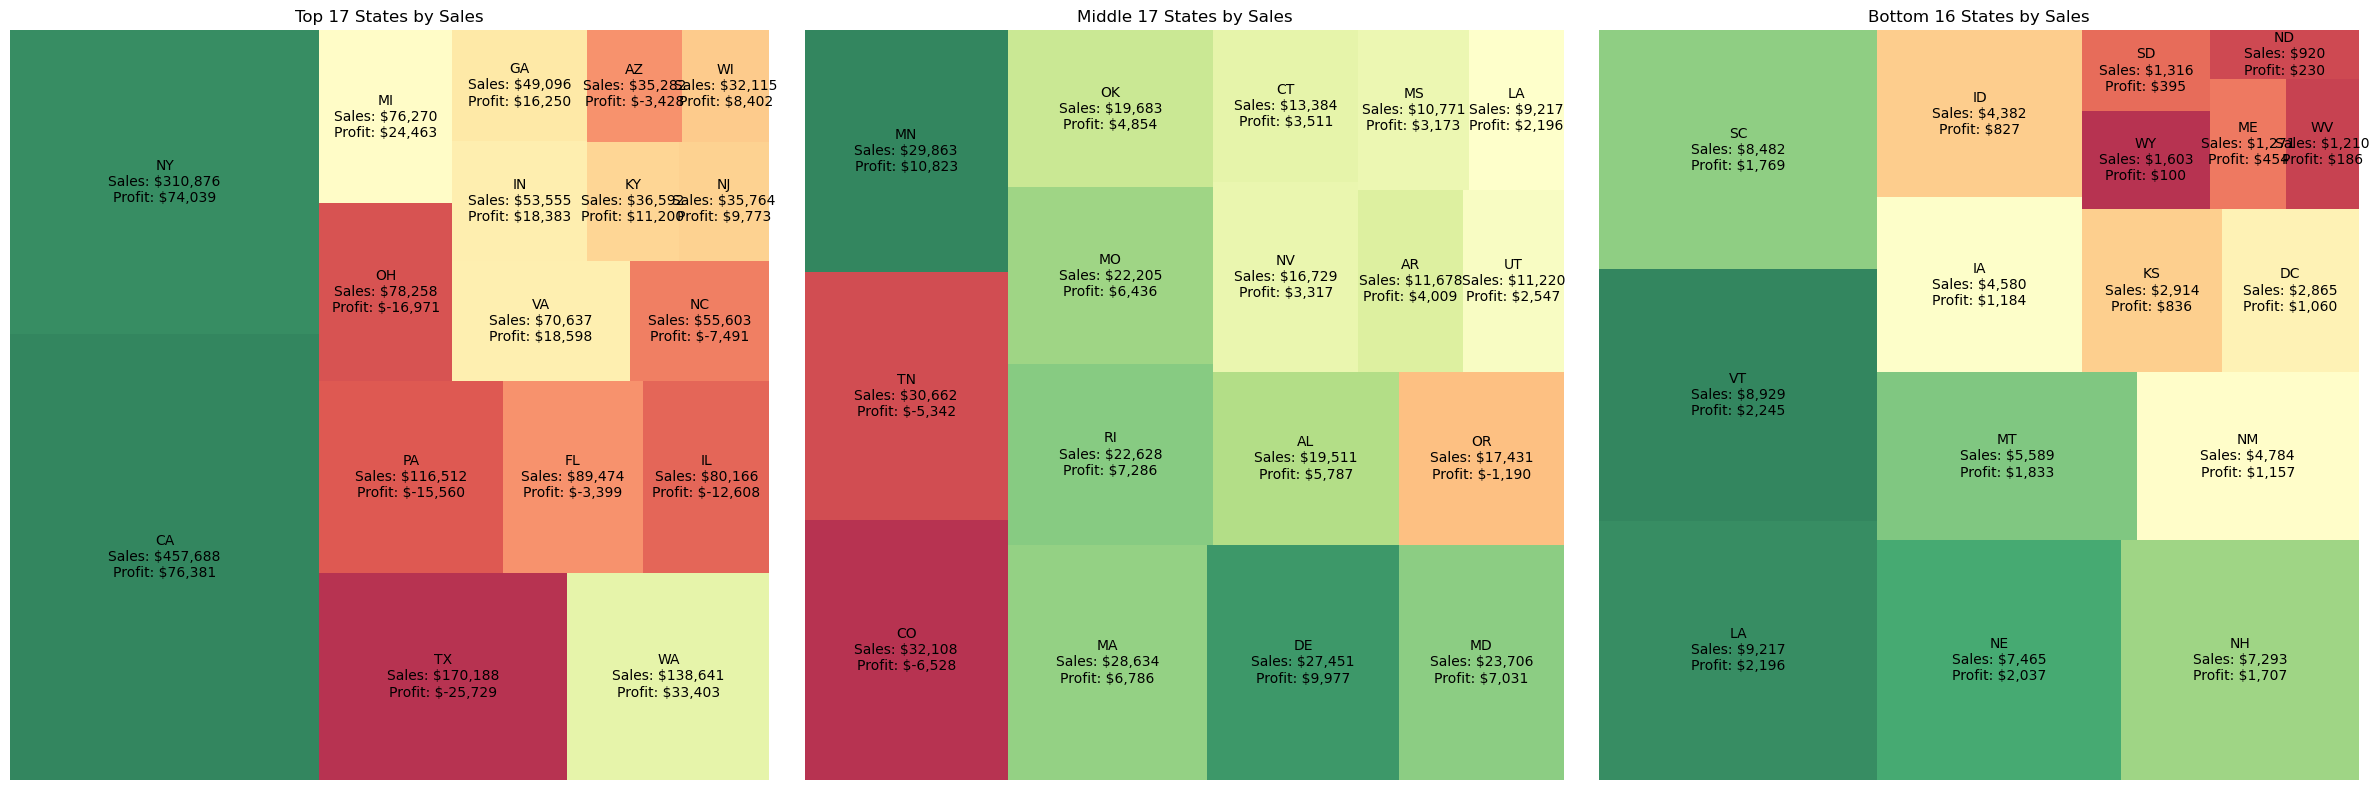

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
from matplotlib import cm
from matplotlib.colors import Normalize

state_metrics = data.groupby('StateAbbrev')[['Sales', 'Profit']].sum().reset_index()

sorted_state_metrics = state_metrics.sort_values(by='Sales', ascending=False)

top_17 = sorted_state_metrics.head(17)
middle_17 = sorted_state_metrics.iloc[17:34]
bottom_16 = sorted_state_metrics.tail(16)

#using cm package to link profits to red-green color of treemap (dark red for lowest profit, and dark green for highest profit as a scale)
def get_colors(profits):
    norm = Normalize(vmin=min(profits), vmax=max(profits)) 
    colormap = cm.RdYlGn 
    return [colormap(norm(p)) for p in profits]

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

colors_top = get_colors(top_17['Profit'])
labels_top = [
    f"{state}\nSales: ${sales:,.0f}\nProfit: ${profit:,.0f}"
    for state, sales, profit in zip(top_17['StateAbbrev'], top_17['Sales'], top_17['Profit'])
]
squarify.plot(
    sizes=top_17['Sales'], 
    label=labels_top, 
    color=colors_top, 
    alpha=0.8, 
    ax=axs[0]
)
axs[0].set_title('Top 17 States by Sales')
axs[0].axis('off')

colors_middle = get_colors(middle_17['Profit'])
labels_middle = [
    f"{state}\nSales: ${sales:,.0f}\nProfit: ${profit:,.0f}"
    for state, sales, profit in zip(middle_17['StateAbbrev'], middle_17['Sales'], middle_17['Profit'])
]
squarify.plot(
    sizes=middle_17['Sales'], 
    label=labels_middle, 
    color=colors_middle, 
    alpha=0.8, 
    ax=axs[1]
)
axs[1].set_title('Middle 17 States by Sales')
axs[1].axis('off')

colors_bottom = get_colors(bottom_16['Profit'])
labels_bottom = [
    f"{state}\nSales: ${sales:,.0f}\nProfit: ${profit:,.0f}"
    for state, sales, profit in zip(bottom_16['StateAbbrev'], bottom_16['Sales'], bottom_16['Profit'])
]
squarify.plot(
    sizes=bottom_16['Sales'], 
    label=labels_bottom, 
    color=colors_bottom, 
    alpha=0.8, 
    ax=axs[2]
)
axs[2].set_title('Bottom 16 States by Sales')
axs[2].axis('off')

plt.tight_layout()
plt.show()


## Gita's Code

In [10]:
import os
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
from datetime import datetime as dt
import numpy as np
from sklearn.linear_model import LinearRegression

In [11]:
#define the file path
superstore = Path('superstore2.csv')

In [12]:
#to read csv file
# Or use 'latin1' => file contains characters that cannot be decoded using the default utf-8 encoding
superstore_df = pd.read_csv(superstore, encoding='ISO-8859-1')  
superstore_df.head()

ï»¿Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   

  Customer_ID    Customer_Name    Segment        Country             City  \
0    CG-12520      Claire Gute   Consumer  United States        Henderson   
1    CG-12520      Claire Gute   Consumer  United States        Henderson   
2    DV-13045  Darrin Van Huff  Corporate  United States      Los Angeles   
3    SO-20335   Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4    SO-20335   Sean O'Donnell   Consumer  United States  Fort Lauderdale   

   ... Postal_Code  Region       Product_ID         Category Sub_Category  \
0  ...       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1  ...       42420   South  FUR-CH-10000454        Furniture       Chairs   
2  ...       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3  ...       33311   South  FUR-TA-10000577        Furniture       Tables   
4  ...       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product_Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                      Eldon Fold N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [13]:
#retrieve the data info
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿Row_ID      9994 non-null   int64  
 1   Order_ID       9994 non-null   object 
 2   Order_Date     9994 non-null   object 
 3   Ship_Date      9994 non-null   object 
 4   Ship_Mode      9994 non-null   object 
 5   Customer_ID    9994 non-null   object 
 6   Customer_Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal_Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product_ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub_Category   9994 non-null   object 
 16  Product_Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [14]:
#to see all the columns
print(superstore_df.columns)

Index(['ï»¿Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [15]:
superstore_df.describe()

ï»¿Row_ID   Postal_Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000

In [16]:
#to convert the order date and ship date columns to datetime


#convert to datetime
superstore_df['Order_Date'] = pd.to_datetime(superstore_df['Order_Date'])
superstore_df['Ship_Date'] = pd.to_datetime(superstore_df['Ship_Date'])

superstore_df.head()

ï»¿Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   

  Customer_ID    Customer_Name    Segment        Country             City  \
0    CG-12520      Claire Gute   Consumer  United States        Henderson   
1    CG-12520      Claire Gute   Consumer  United States        Henderson   
2    DV-13045  Darrin Van Huff  Corporate  United States      Los Angeles   
3    SO-20335   Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4    SO-20335   Sean O'Donnell   Consumer  United States  Fort Lauderdale   

   ... Postal_Code  Region       Product_ID         Category Sub_Category  \
0  ...       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1  ...       42420   South  FUR-CH-10000454        Furniture       Chairs   
2  ...       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3  ...       33311   South  FUR-TA-10000577        Furniture       Tables   
4  ...       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product_Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                      Eldon Fold N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [17]:
#make sure the code work and data type change
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ï»¿Row_ID      9994 non-null   int64         
 1   Order_ID       9994 non-null   object        
 2   Order_Date     9994 non-null   datetime64[ns]
 3   Ship_Date      9994 non-null   datetime64[ns]
 4   Ship_Mode      9994 non-null   object        
 5   Customer_ID    9994 non-null   object        
 6   Customer_Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal_Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product_ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub_Category   9994 n

In [18]:
##compare year over year performance by sales and profit 

In [19]:
# Convert the 'Order Date' column to datetime
superstore_df['Order_Date'] = pd.to_datetime(superstore_df['Order_Date'], format='%m/%d/%Y')

In [20]:
# Extract the year from the 'Order Date'
superstore_df['Year'] = superstore_df['Order_Date'].dt.year
# Group the data by year and calculate total sales
yearly_sales = superstore_df.groupby('Year')['Sales'].sum().reset_index()
yearly_sales

Year        Sales
0  2014  484247.4981
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552

In [21]:
#Group the data by year and compute total sales and total profit
yearly_metrics = superstore_df.groupby('Year')[['Sales', 'Profit']].sum().reset_index()
yearly_metrics

Year        Sales      Profit
0  2014  484247.4981  49543.9741
1  2015  470532.5090  61618.6037
2  2016  609205.5980  81795.1743
3  2017  733215.2552  93439.2696

/var/folders/l7/887zj8mx41s138tnzc8jfx0c0000gn/T/ipykernel_80766/2038546506.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




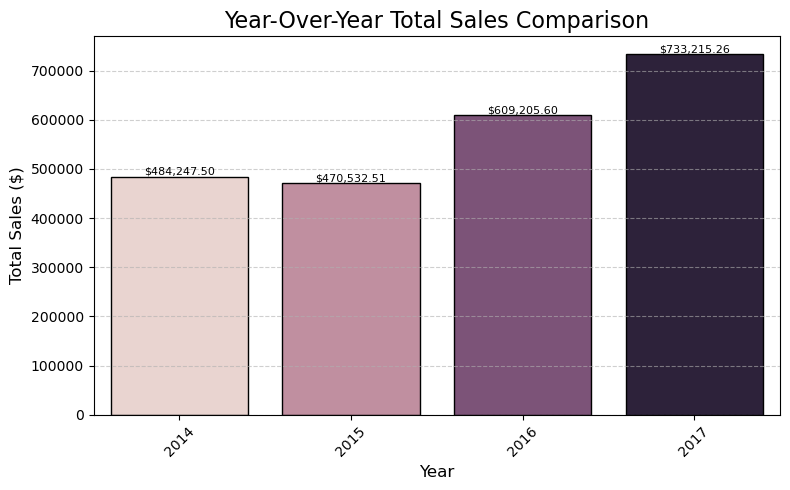

In [22]:


# Assuming `yearly_sales` is a DataFrame with 'Year' and 'Sales' columns
plt.figure(figsize=(8, 5))

# Create a bar chart using Seaborn
ax = sns.barplot(
    x='Year',
    y='Sales',
    data=yearly_sales,  # Corrected reference to `yearly_sales`
    palette=sns.cubehelix_palette(as_cmap=False, n_colors=len(yearly_sales)),  # Set as_cmap to False for palette
    edgecolor='black'
)

# Add labels on top of each bar
for p in ax.patches:  # Use `ax.patches` to access bars in Seaborn
    height = p.get_height()
    ax.annotate(
        f'${height:,.2f}',  # Format as currency with two decimal places
        (p.get_x() + p.get_width() / 2, height),  # Position at top of the bar
        ha='center',
        va='bottom',
        fontsize=8
    )

# Customize the chart
plt.title('Year-Over-Year Total Sales Comparison', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

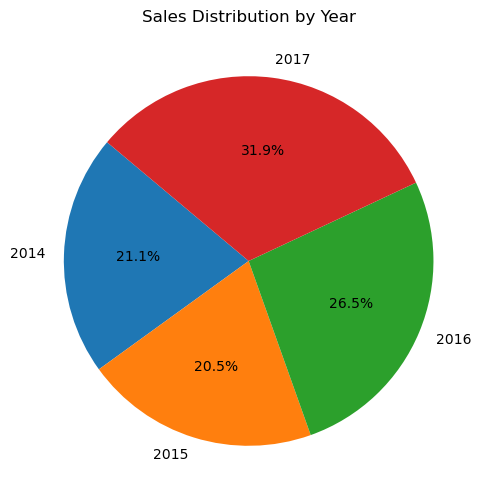

In [23]:
#to see the percentage in the pie charts for year over year total sales comparison

plt.figure(figsize=(8, 6))
plt.pie(
    yearly_sales['Sales'], 
    labels=yearly_sales['Year'], 
    autopct='%1.1f%%', 
    startangle=140)

plt.title("Sales Distribution by Year")
plt.show()


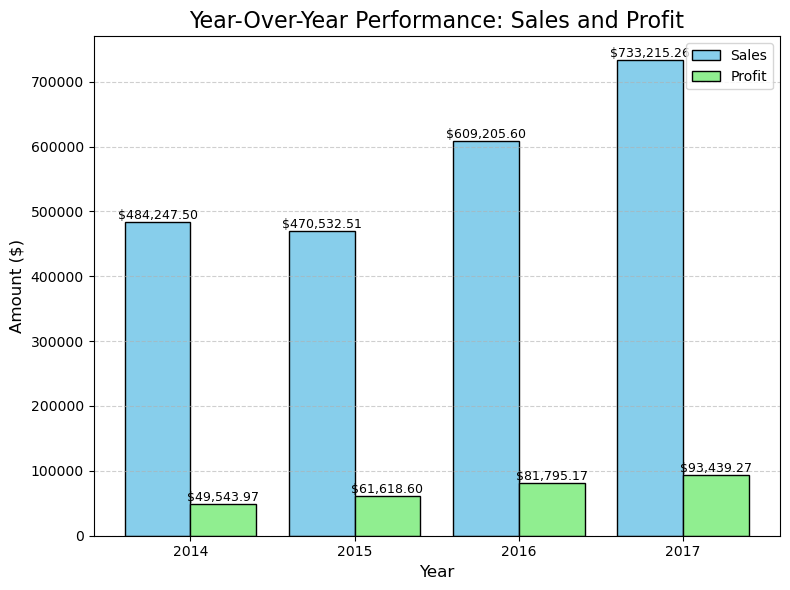

In [24]:
# Step 3: Visualize the Year-Over-Year Performance Using Matplotlib
plt.figure(figsize=(8, 6))

# Bar chart for Sales
bars1 = plt.bar(yearly_metrics['Year'] - 0.2, yearly_metrics['Sales'], width=0.4, label='Sales', color='skyblue', edgecolor='black')

# Bar chart for Profit
bars2 = plt.bar(yearly_metrics['Year'] + 0.2, yearly_metrics['Profit'], width=0.4, label='Profit', color='lightgreen', edgecolor='black')

# Add labels on top of the bars
for bar in bars1:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'${bar.get_height():,.2f}',
        ha='center',
        va='bottom',
        fontsize=9
    )
for bar in bars2:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'${bar.get_height():,.2f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Customize the chart
plt.title('Year-Over-Year Performance: Sales and Profit', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(yearly_metrics['Year'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

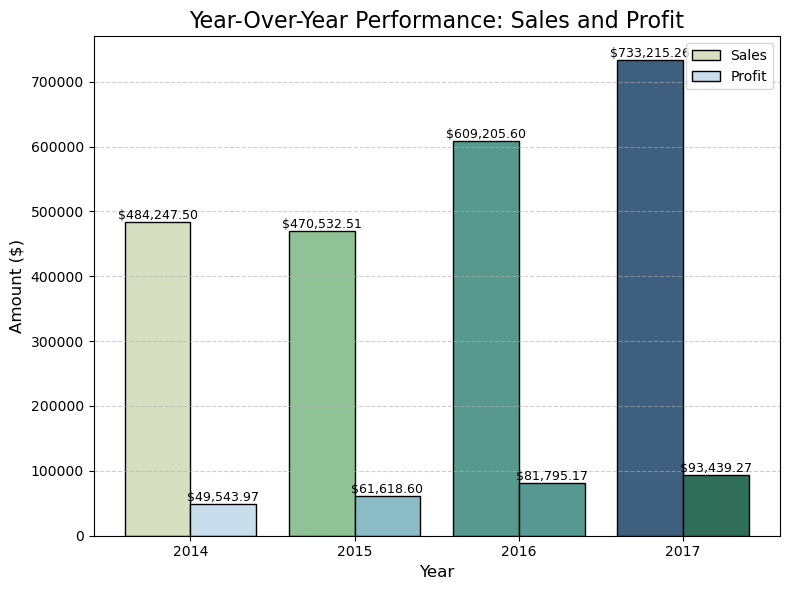

In [25]:


# Assuming `yearly_metrics` is a DataFrame with 'Year', 'Sales', and 'Profit' columns
plt.figure(figsize=(8, 6))

# Define the bar width
bar_width = 0.4

# Define positions for the bars
x_positions = np.arange(len(yearly_metrics['Year']))

# Generate cubehelix palettes
sales_palette = sns.cubehelix_palette(start=0.5, rot=-0.75, n_colors=len(yearly_metrics), light=0.85, dark=0.35)
profit_palette = sns.cubehelix_palette(start=2, rot=0.25, n_colors=len(yearly_metrics), light=0.85, dark=0.35)

# Bar chart for Sales
bars1 = plt.bar(
    x_positions - bar_width / 2,
    yearly_metrics['Sales'],
    width=bar_width,
    label='Sales',
    color=sales_palette,  # Apply the cubehelix palette for Sales
    edgecolor='black'
)

# Bar chart for Profit
bars2 = plt.bar(
    x_positions + bar_width / 2,
    yearly_metrics['Profit'],
    width=bar_width,
    label='Profit',
    color=profit_palette,  # Apply the cubehelix palette for Profit
    edgecolor='black'
)

# Add labels on top of the bars
for bar in bars1:
    height = bar.get_height()
    if height > 0:  # Only add labels for positive bars
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'${height:,.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

for bar in bars2:
    height = bar.get_height()
    if height > 0:  # Only add labels for positive bars
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'${height:,.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Customize the chart
plt.title('Year-Over-Year Performance: Sales and Profit', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(x_positions, yearly_metrics['Year'])  # Use the center positions for xticks
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

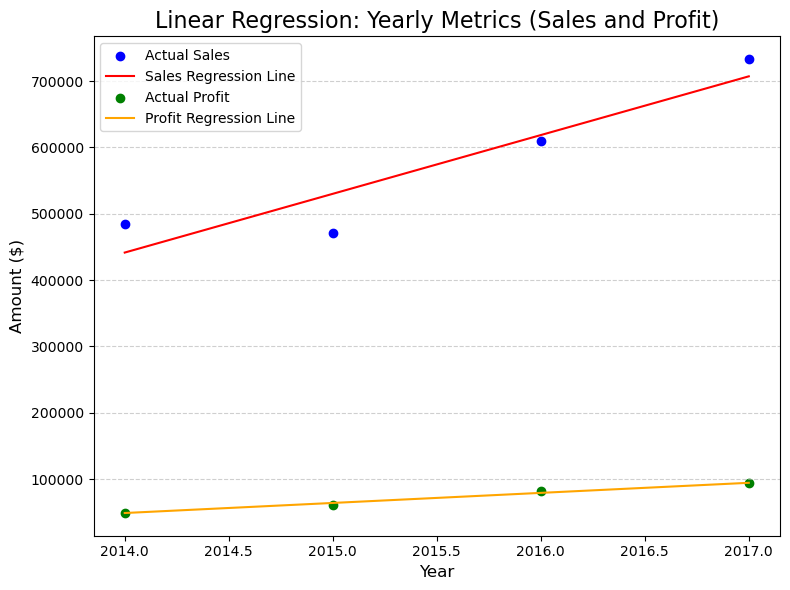

Sales Linear Regression: Slope = 88557.63603000001, Intercept = -177913615.20339003
Profit Linear Regression: Slope = 15186.245709999994, Intercept = -30536278.97307999


In [26]:
# Group the data by year and compute total sales and total profit
yearly_metrics_linear = yearly_metrics.groupby('Year')[['Sales', 'Profit']].sum().reset_index()

# Prepare data for linear regression for Sales and Profit
X = yearly_metrics_linear['Year'].values.reshape(-1, 1)  # Independent variable (Year)

# Linear regression for Sales
y_sales = yearly_metrics_linear['Sales'].values  # Dependent variable (Total Sales)
sales_model = LinearRegression()
sales_model.fit(X, y_sales)
sales_pred = sales_model.predict(X)

# Linear regression for Profit
y_profit = yearly_metrics_linear['Profit'].values  # Dependent variable (Total Profit)
profit_model = LinearRegression()
profit_model.fit(X, y_profit)
profit_pred = profit_model.predict(X)

# Plot the original data and regression lines for Sales and Profit
plt.figure(figsize=(8, 6))

# Scatter plot and regression line for Sales
plt.scatter(X, y_sales, color='blue', label='Actual Sales')
plt.plot(X, sales_pred, color='red', label='Sales Regression Line')

# Scatter plot and regression line for Profit
plt.scatter(X, y_profit, color='green', label='Actual Profit')
plt.plot(X, profit_pred, color='orange', label='Profit Regression Line')

# Customize the chart
plt.title('Linear Regression: Yearly Metrics (Sales and Profit)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Display the regression coefficients for Sales and Profit
sales_slope, sales_intercept = sales_model.coef_[0], sales_model.intercept_
profit_slope, profit_intercept = profit_model.coef_[0], profit_model.intercept_

print(f"Sales Linear Regression: Slope = {sales_slope}, Intercept = {sales_intercept}")
print(f"Profit Linear Regression: Slope = {profit_slope}, Intercept = {profit_intercept}")

In [27]:
##compare year over year performance by quantity
#Group the data by year and compute the total count of orders
yearly_order_count = superstore_df.groupby('Year')['Order_ID'].nunique().reset_index()
yearly_order_count

Year  Order_ID
0  2014       969
1  2015      1038
2  2016      1315
3  2017      1687

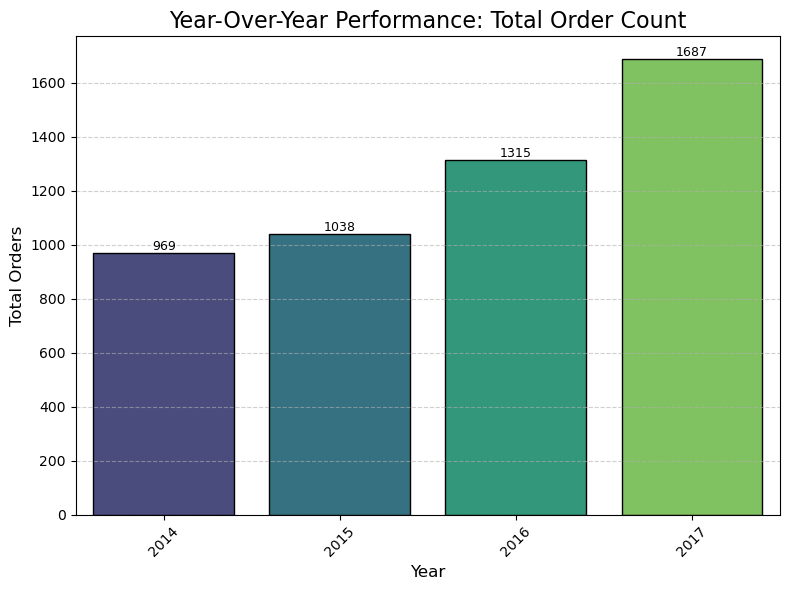

In [28]:


# Assuming 'yearly_order_count' is a DataFrame with 'Year' and 'Order ID' columns
plt.figure(figsize=(8, 6))

# Create a bar chart using Seaborn
ax = sns.barplot(
    x='Year',
    y='Order_ID',
    hue='Year',  # Assign `Year` as `hue`
    data=yearly_order_count,
    palette=sns.color_palette("viridis", n_colors=len(yearly_order_count)),
    edgecolor='black',
    legend=False  # Disable legend since hue is only for the palette
)

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Display as integer
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position on top of each bar
        ha='center',
        va='bottom',
        fontsize=9
    )

# Customize the chart
plt.title('Year-Over-Year Performance: Total Order Count', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

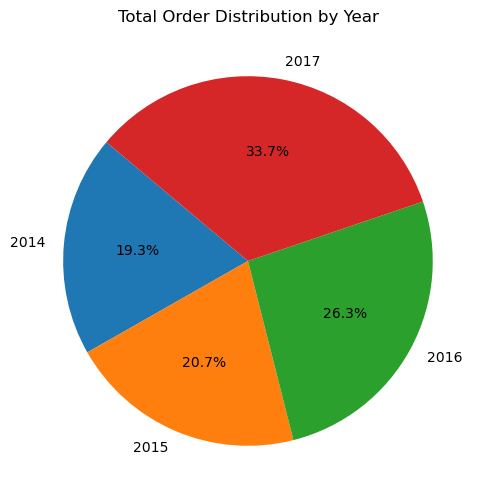

In [29]:
#to see the percentage in the pie charts for year over year total order count

plt.figure(figsize=(8, 6))
plt.pie(
   yearly_order_count['Order_ID'], 
    labels=yearly_order_count['Year'], 
    autopct='%1.1f%%', 
    startangle=140)

plt.title("Total Order Distribution by Year")
plt.show()


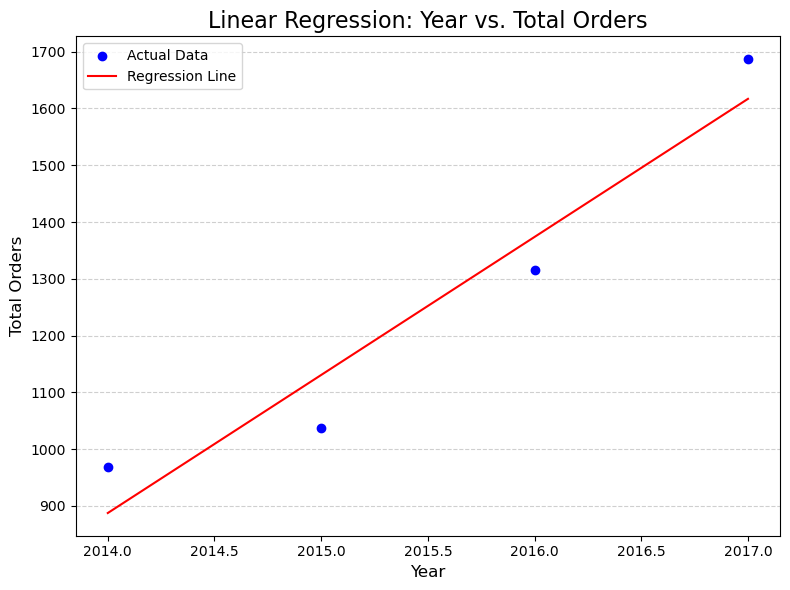

Slope: 243.09999999999994
Intercept: -488715.7999999999


In [30]:



# Prepare data for linear regression
X = yearly_order_count['Year'].values.reshape(-1, 1)  # Independent variable (Year)
y = yearly_order_count['Order_ID'].values          # Dependent variable (Total Orders)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict total orders based on the linear regression model
y_pred = model.predict(X)

# Plot the original data and the regression line
plt.figure(figsize=(8, 6))

# Scatter plot of the actual data
plt.scatter(X, y, color='blue', label='Actual Data')

# Regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Customize the chart
plt.title('Linear Regression: Year vs. Total Orders', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print the regression coefficients
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

In [31]:
#identify monthly/seasonal trends in sales
# Extract the month from the 'Order Date'
superstore_df['Month'] = superstore_df['Order_Date'].dt.month


In [32]:
# Group the data by month and compute total sales
monthly_sales = superstore_df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales

Month        Sales
0       1   94924.8356
1       2   59751.2514
2       3  205005.4888
3       4  137762.1286
4       5  155028.8117
5       6  152718.6793
6       7  147238.0970
7       8  159044.0630
8       9  307649.9457
9      10  200322.9847
10     11  352461.0710
11     12  325293.5035

In [33]:
monthly_sales['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [34]:
#to specify the name of months
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

monthly_sales['MonthName'] = monthly_sales['Month'].map(month_mapping)
monthly_sales

Month        Sales  MonthName
0       1   94924.8356    January
1       2   59751.2514   February
2       3  205005.4888      March
3       4  137762.1286      April
4       5  155028.8117        May
5       6  152718.6793       June
6       7  147238.0970       July
7       8  159044.0630     August
8       9  307649.9457  September
9      10  200322.9847    October
10     11  352461.0710   November
11     12  325293.5035   December

/var/folders/l7/887zj8mx41s138tnzc8jfx0c0000gn/T/ipykernel_80766/1283481507.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




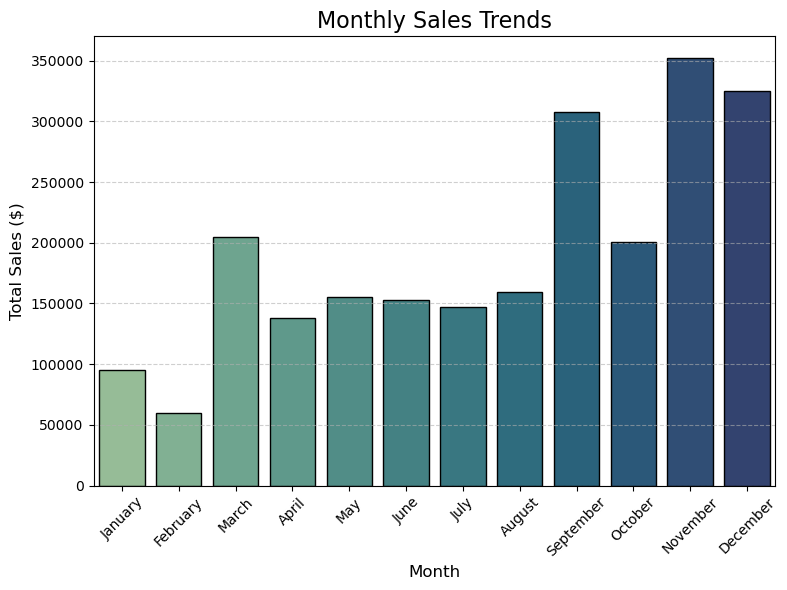

    Month        Sales  MonthName
0       1   94924.8356    January
1       2   59751.2514   February
2       3  205005.4888      March
3       4  137762.1286      April
4       5  155028.8117        May
5       6  152718.6793       June
6       7  147238.0970       July
7       8  159044.0630     August
8       9  307649.9457  September
9      10  200322.9847    October
10     11  352461.0710   November
11     12  325293.5035   December


In [35]:
# Plot the monthly sales
plt.figure(figsize=(8, 6))
#plt.bar(monthly_sales['MonthName'], monthly_sales['Sales'], color='purple', edgecolor='black')
sns.barplot(x='MonthName', y='Sales', data=monthly_sales, palette=sns.color_palette("crest", n_colors=len(monthly_sales)), edgecolor='black')
#sns.color_palette("crest", as_cmap=True)

# Add labels
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
#sns.barplot(x=avg_price_by_sellerg.index, y=avg_price_by_sellerg.values, palette='magma')

# Show the plot
plt.tight_layout()
plt.show()

# Print the monthly sales data
print(monthly_sales)

## Wisdom's Code

In [36]:
# Import os
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In [37]:
# Define the file path
superstore = Path('superstore_data.csv')
# Read csv file
superstore_df = pd.read_csv(superstore, encoding='ISO-8859-1')  
superstore_df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [38]:
# Count the rows
superstore_df.count()

Row ID           9994
Order ID         9994
Order Date       9994
Ship Date        9994
Ship Mode        9994
Customer ID      9994
Customer Name    9994
Segment          9994
Country          9994
City             9994
State            9994
Postal Code      9994
Region           9994
Product ID       9994
Category         9994
Sub-Category     9994
Product Name     9994
Sales            9994
Quantity         9994
Discount         9994
Profit           9994
dtype: int64

In [39]:
# Retrieve the data info
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [40]:
# View all the columns
print(superstore_df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [41]:
# Convert the order date and ship date columns to datetime

from datetime import datetime as dt

# Convert to datetime
superstore_df['Order Date'] = pd.to_datetime(superstore_df['Order Date'])
superstore_df['Ship Date'] = pd.to_datetime(superstore_df['Ship Date'])

superstore_df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [42]:
# View data type
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## Bar Plot Showing Profitability By State

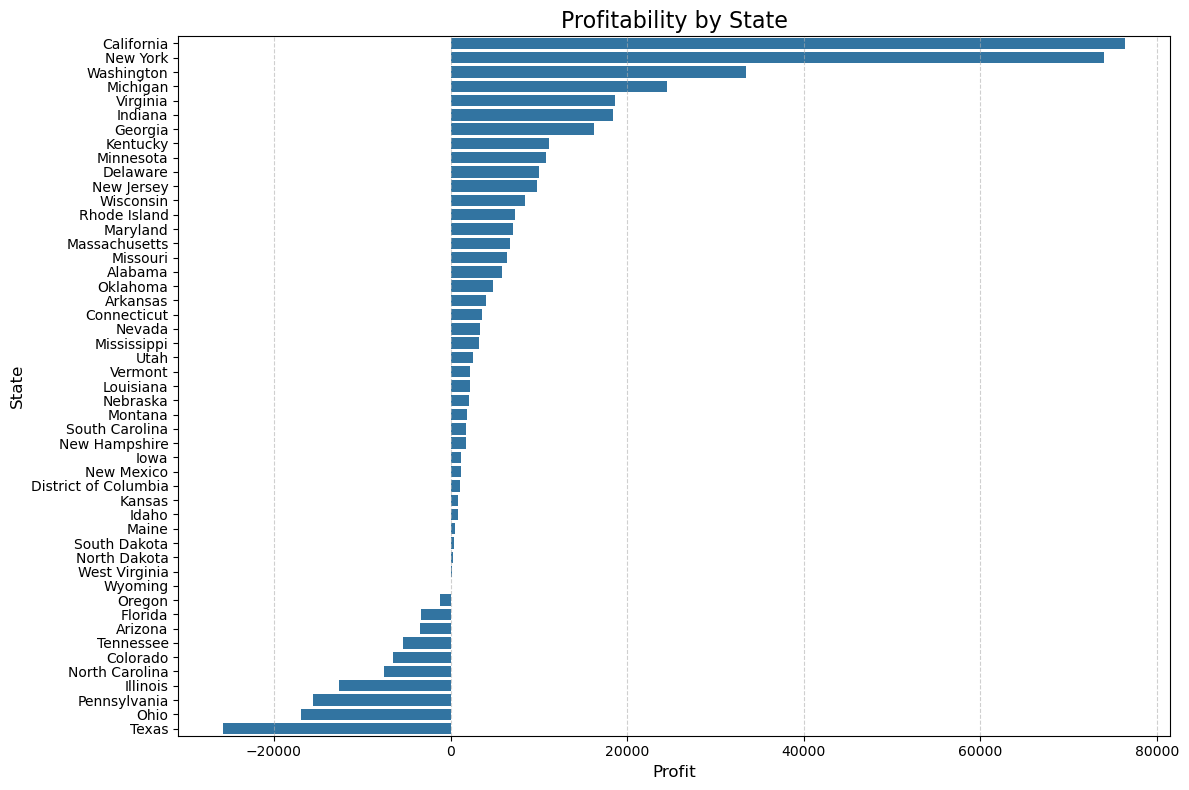

In [43]:
# Aggregate profitability by state
state_profit = superstore_df.groupby('State')['Profit'].sum().reset_index()

# Sort by profit for better visualization
state_profit_sorted = state_profit.sort_values(by='Profit', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Profit', 
    y='State', 
    data=state_profit_sorted, 
    order=state_profit_sorted['State']
)
plt.title('Profitability by State', fontsize=16)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Bar Chart Showing Most Popular Category By State

                    State         Category       Sales
2                 Alabama       Technology    8969.080
3                 Arizona        Furniture   13525.291
7                Arkansas  Office Supplies    4565.330
11             California       Technology  159271.082
12               Colorado        Furniture   13243.037
16            Connecticut  Office Supplies    5418.340
20               Delaware       Technology   14562.220
23   District of Columbia       Technology    1379.920
26                Florida       Technology   46968.036
28                Georgia  Office Supplies   26715.810
30                  Idaho        Furniture    2595.482
35               Illinois       Technology   31983.673
38                Indiana       Technology   26323.250
39                   Iowa        Furniture    2642.310
43                 Kansas  Office Supplies    1954.150
47               Kentucky       Technology   12570.640
49              Louisiana  Office Supplies    3423.160
53        

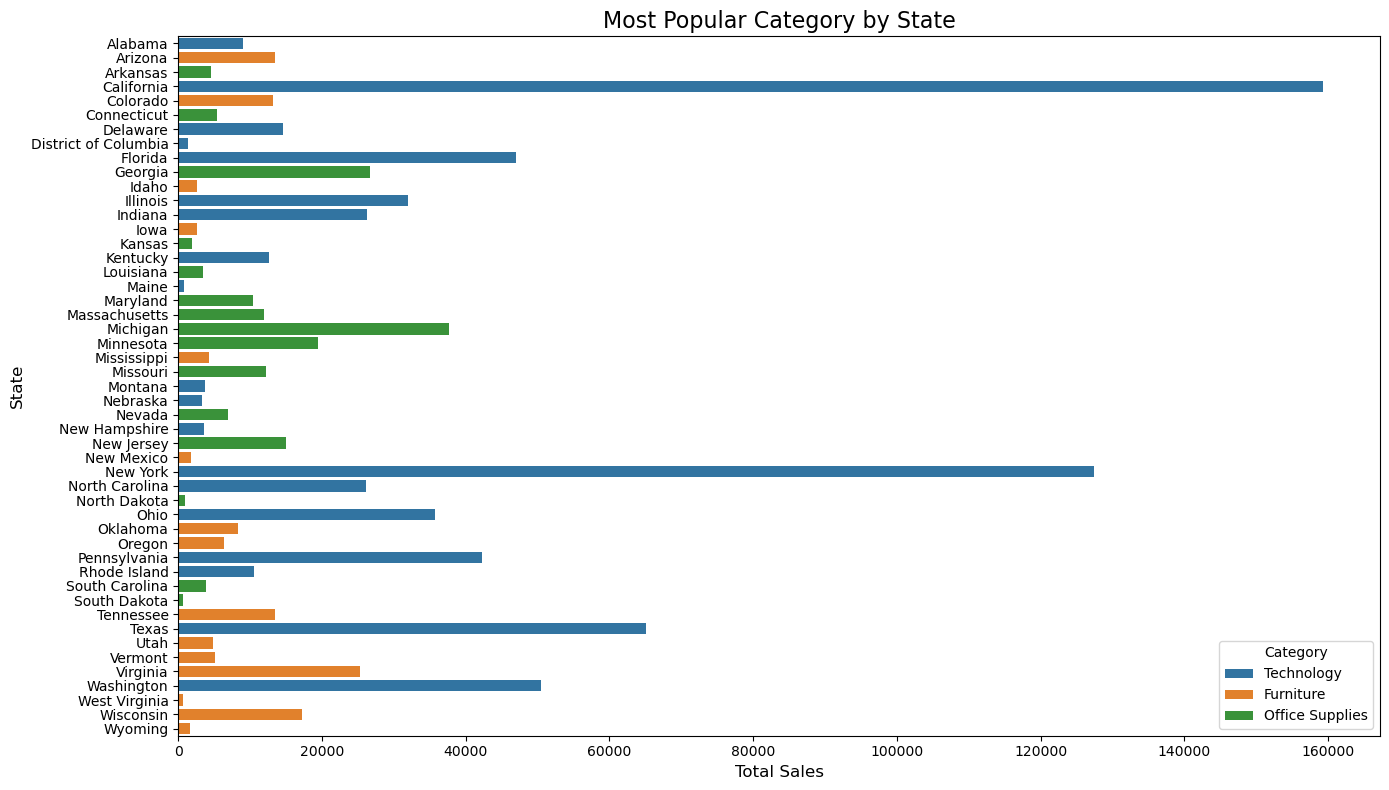

In [44]:
# Identify the most popular category in each state based on sales
state_category_sales = superstore_df.groupby(['State', 'Category'])['Sales'].sum().reset_index()

# Determine the most popular category for each state
most_popular_category = state_category_sales.loc[
    state_category_sales.groupby('State')['Sales'].idxmax()
]

# Plot a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Sales', 
    y='State', 
    hue='Category', 
    data=most_popular_category, 
    dodge=False  
)
plt.title('Most Popular Category by State', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.legend(title='Category')
plt.tight_layout()

# Display the results
print(most_popular_category)

plt.show()

## Interactive Map Showing Sales And Profit For Each State



In [45]:
import folium
from folium.plugins import MarkerCluster

# Full list of state coordinates
state_coordinates = {
    "Alabama": [32.806671, -86.791130],
    "Alaska": [61.370716, -152.404419],
    "Arizona": [33.729759, -111.431221],
    "Arkansas": [34.969704, -92.373123],
    "California": [36.116203, -119.681564],
    "Colorado": [39.059811, -105.311104],
    "Connecticut": [41.597782, -72.755371],
    "Delaware": [39.318523, -75.507141],
    "Florida": [27.766279, -81.686783],
    "Georgia": [33.040619, -83.643074],
    "Hawaii": [21.094318, -157.498337],
    "Idaho": [44.240459, -114.478828],
    "Illinois": [40.349457, -88.986137],
    "Indiana": [39.849426, -86.258278],
    "Iowa": [42.011539, -93.210526],
    "Kansas": [38.526600, -96.726486],
    "Kentucky": [37.668140, -84.670067],
    "Louisiana": [31.169546, -91.867805],
    "Maine": [44.693947, -69.381927],
    "Maryland": [39.063946, -76.802101],
    "Massachusetts": [42.230171, -71.530106],
    "Michigan": [43.326618, -84.536095],
    "Minnesota": [45.694454, -93.900192],
    "Mississippi": [32.741646, -89.678696],
    "Missouri": [38.456085, -92.288368],
    "Montana": [46.921925, -110.454353],
    "Nebraska": [41.125370, -98.268082],
    "Nevada": [38.313515, -117.055374],
    "New Hampshire": [43.452492, -71.563896],
    "New Jersey": [40.298904, -74.521011],
    "New Mexico": [34.840515, -106.248482],
    "New York": [42.165726, -74.948051],
    "North Carolina": [35.630066, -79.806419],
    "North Dakota": [47.528912, -99.784012],
    "Ohio": [40.388783, -82.764915],
    "Oklahoma": [35.565342, -96.928917],
    "Oregon": [44.572021, -122.070938],
    "Pennsylvania": [40.590752, -77.209755],
    "Rhode Island": [41.680893, -71.511780],
    "South Carolina": [33.856892, -80.945007],
    "South Dakota": [44.299782, -99.438828],
    "Tennessee": [35.747845, -86.692345],
    "Texas": [31.054487, -97.563461],
    "Utah": [40.150032, -111.862434],
    "Vermont": [44.045876, -72.710686],
    "Virginia": [37.769337, -78.169968],
    "Washington": [47.400902, -121.490494],
    "West Virginia": [38.491226, -80.954456],
    "Wisconsin": [44.268543, -89.616508],
    "Wyoming": [42.755966, -107.302490]
}

# Aggregate data by state and region 
state_geo_data = superstore_df.groupby(['State', 'Region'])[['Profit', 'Sales']].sum().reset_index()

# Create a base map centered on the US
us_superstore_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers for each state with sales and profit information
marker_cluster = MarkerCluster().add_to(us_superstore_map)

for _, row in state_geo_data.iterrows():
    state_name = row['State']
    if state_name in state_coordinates: 
        folium.Marker(
            location=state_coordinates[state_name],
            popup=(
                f"State: {row['State']}<br>"
                f"Region: {row['Region']}<br>"
                f"Total Profit: ${row['Profit']:.2f}<br>"
                f"Total Sales: ${row['Sales']:.2f}"
            ),
        ).add_to(marker_cluster)

# Save the map as an HTML file
us_superstore_map.save("interactive_superstore_map_with_coordinates.html")

print("Map saved to interactive_superstore_map_with_coordinates.html")

Map saved to interactive_superstore_map_with_coordinates.html


##  Correlation Between Sales, Profit And Discount


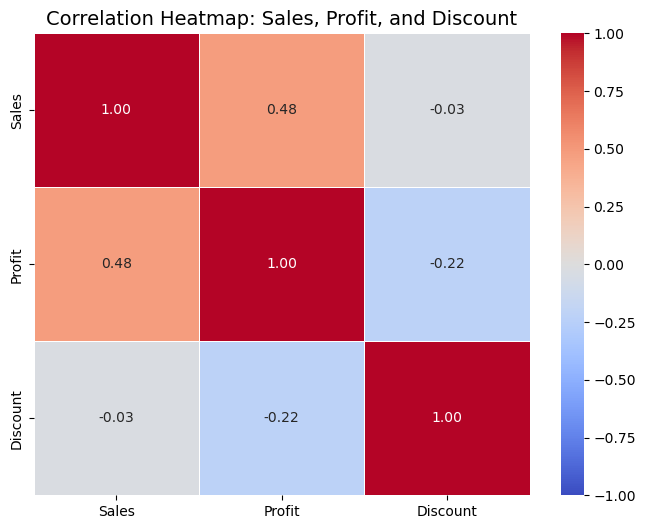

In [46]:

# Preparing data for the heatmap (correlation between sales, profit, and discount)
correlation_data = superstore_df[['Sales', 'Profit', 'Discount']].corr()

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_data,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    vmin=-1,
    vmax=1
)
plt.title('Correlation Heatmap: Sales, Profit, and Discount', fontsize=14)
plt.show()

## Comparison Of Total Profit Across Regions


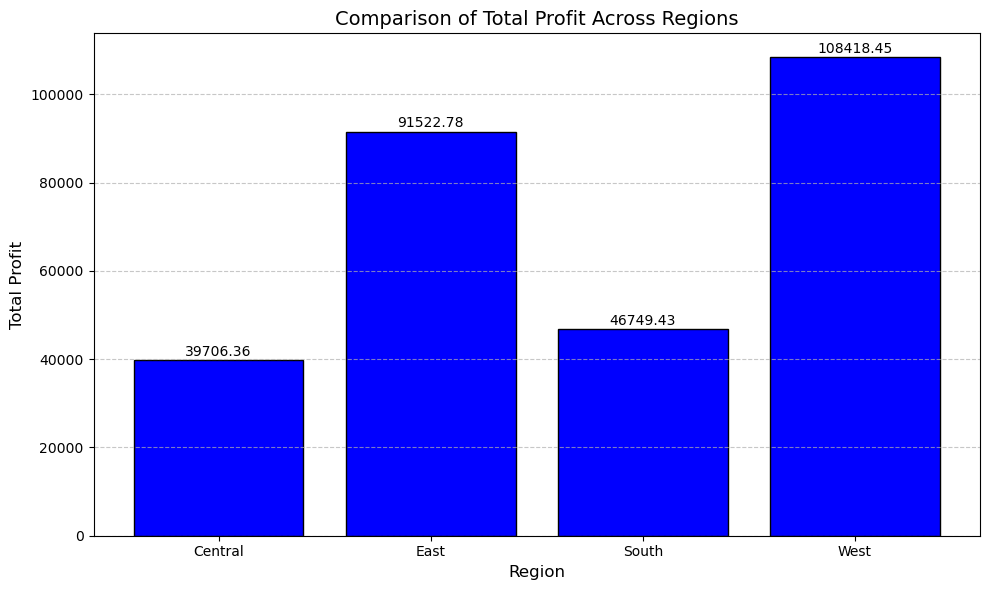

In [47]:
region_analysis = superstore_df.groupby('Region').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Avg_Discount=('Discount', 'mean')
).reset_index()

# Calculate total profit per region
total_profit_by_region = region_analysis[['Region', 'Total_Profit']]

# Bar chart to compare total profit across regions
plt.figure(figsize=(10, 6))

# Plotting total profit by region
plt.bar(total_profit_by_region['Region'], total_profit_by_region['Total_Profit'], color='blue', edgecolor='black')

# Adding labels and title
plt.title('Comparison of Total Profit Across Regions', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the bars with profit values
for index, value in enumerate(total_profit_by_region['Total_Profit']):
    plt.text(index, value + 1000, f'{value:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Analysis Of Shipment Rate By Quarter

In [48]:
# Adding a column for the quarter
superstore_df['Quarter'] = superstore_df['Order Date'].dt.quarter

# Aggregating data to calculate the shipment rate by quarter
quarter_shipments = superstore_df.groupby('Quarter').size().reset_index(name='Shipment_Count')

# Determining the quarter with the highest rate of shipments
max_shipment_quarter = quarter_shipments.loc[quarter_shipments['Shipment_Count'].idxmax()]

# Aggregating data to find the city/state with the highest total profit
city_state_profit = superstore_df.groupby(['City', 'State']).agg(
    Total_Profit=('Profit', 'sum')
).reset_index()

highest_profit_city_state = city_state_profit.loc[city_state_profit['Total_Profit'].idxmax()]

# Filtering the data to get the items in the city/state with the highest profit
items_highest_profit = superstore_df[
    (superstore_df['City'] == highest_profit_city_state['City']) &
    (superstore_df['State'] == highest_profit_city_state['State'])
][['Product Name', 'Profit']]

top_10_items_highest_profit = items_highest_profit.sort_values(by='Profit', ascending=False).head(10)

# Displaying the results
print("Quarterly Shipment Rates:")
print(quarter_shipments)

print("\nQuarter with the Highest Shipment Rate:")
print(max_shipment_quarter)

print("\nCity/State with the Highest Profit:")
print(highest_profit_city_state)

print("\nItems Contributing to the Highest Profit in the Most Profitable City/State:")
top_10_items_highest_profit

Quarterly Shipment Rates:
   Quarter  Shipment_Count
0        1            1377
1        2            2120
2        3            2799
3        4            3698

Quarter with the Highest Shipment Rate:
Quarter              4
Shipment_Count    3698
Name: 3, dtype: int64

City/State with the Highest Profit:
City            New York City
State                New York
Total_Profit       62036.9837
Name: 380, dtype: object

Items Contributing to the Highest Profit in the Most Profitable City/State:


Product Name     Profit
2623              Canon imageCLASS 2200 Advanced Copier  3919.9888
6626  HP Designjet T520 Inkjet Large Format Printer ...  2239.9872
8204                  Zebra ZM400 Thermal Label Printer  2229.0240
318   Canon imageCLASS MF7460 Monochrome Digital Las...  1995.9900
7914  Hewlett-Packard Desktjet 6988DT Refurbished Pr...  1668.2050
9270         GBC DocuBind TL300 Electric Binding System  1453.1238
353           GBC DocuBind P400 Electric Binding System  1415.4296
5126                  Ativa V4110MDD Micro-Cut Shredder  1371.9804
6340   3D Systems Cube Printer, 2nd Generation, Magenta  1351.9896
2182                        Bady BDG101FRU Card Printer  1159.9855

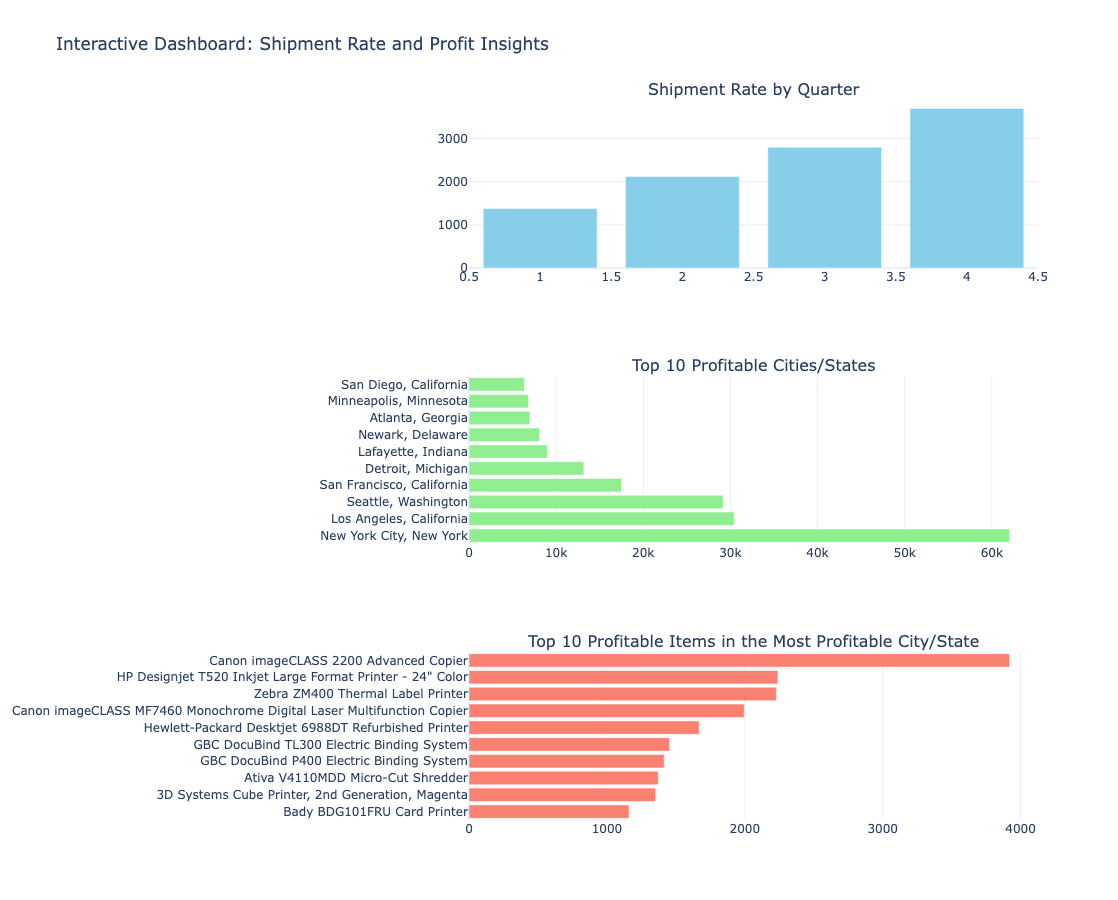

In [49]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data preparation for the dashboard
# Shipment rate by quarter (bar chart)
quarter_shipments_sorted = quarter_shipments.sort_values(by='Shipment_Count', ascending=False)

# Profit by city/state (horizontal bar chart)
city_state_profit_sorted = city_state_profit.sort_values(by='Total_Profit', ascending=False).head(10)

# Items contributing to the highest profit in the most profitable city/state (horizontal bar chart)
top_items_sorted = top_10_items_highest_profit.sort_values(by='Profit', ascending=True)

# Create the dashboard with subplots
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=(
        "Shipment Rate by Quarter",
        "Top 10 Profitable Cities/States",
        "Top 10 Profitable Items in the Most Profitable City/State"
    ),
    vertical_spacing=0.15
)

# Shipment rate by quarter
fig.add_trace(
    go.Bar(
        x=quarter_shipments_sorted['Quarter'],
        y=quarter_shipments_sorted['Shipment_Count'],
        marker_color='skyblue',
        name="Shipments by Quarter"
    ),
    row=1, col=1
)

# Profit by city/state
fig.add_trace(
    go.Bar(
        x=city_state_profit_sorted['Total_Profit'],
        y=city_state_profit_sorted['City'] + ", " + city_state_profit_sorted['State'],
        orientation='h',
        marker_color='lightgreen',
        name="Profit by City/State"
    ),
    row=2, col=1
)

# Top 10 profitable items in the most profitable city/state
fig.add_trace(
    go.Bar(
        x=top_items_sorted['Profit'],
        y=top_items_sorted['Product Name'],
        orientation='h',
        marker_color='salmon',
        name="Top Items by Profit"
    ),
    row=3, col=1
)

# Update layout
fig.update_layout(
    title="Interactive Dashboard: Shipment Rate and Profit Insights",
    height=900,
    showlegend=False,
    template="plotly_white"
)

# Show the interactive dashboard
fig.show()

## Analysis Showing The Contribution Of Customer Segment To Regional Sales And Profit

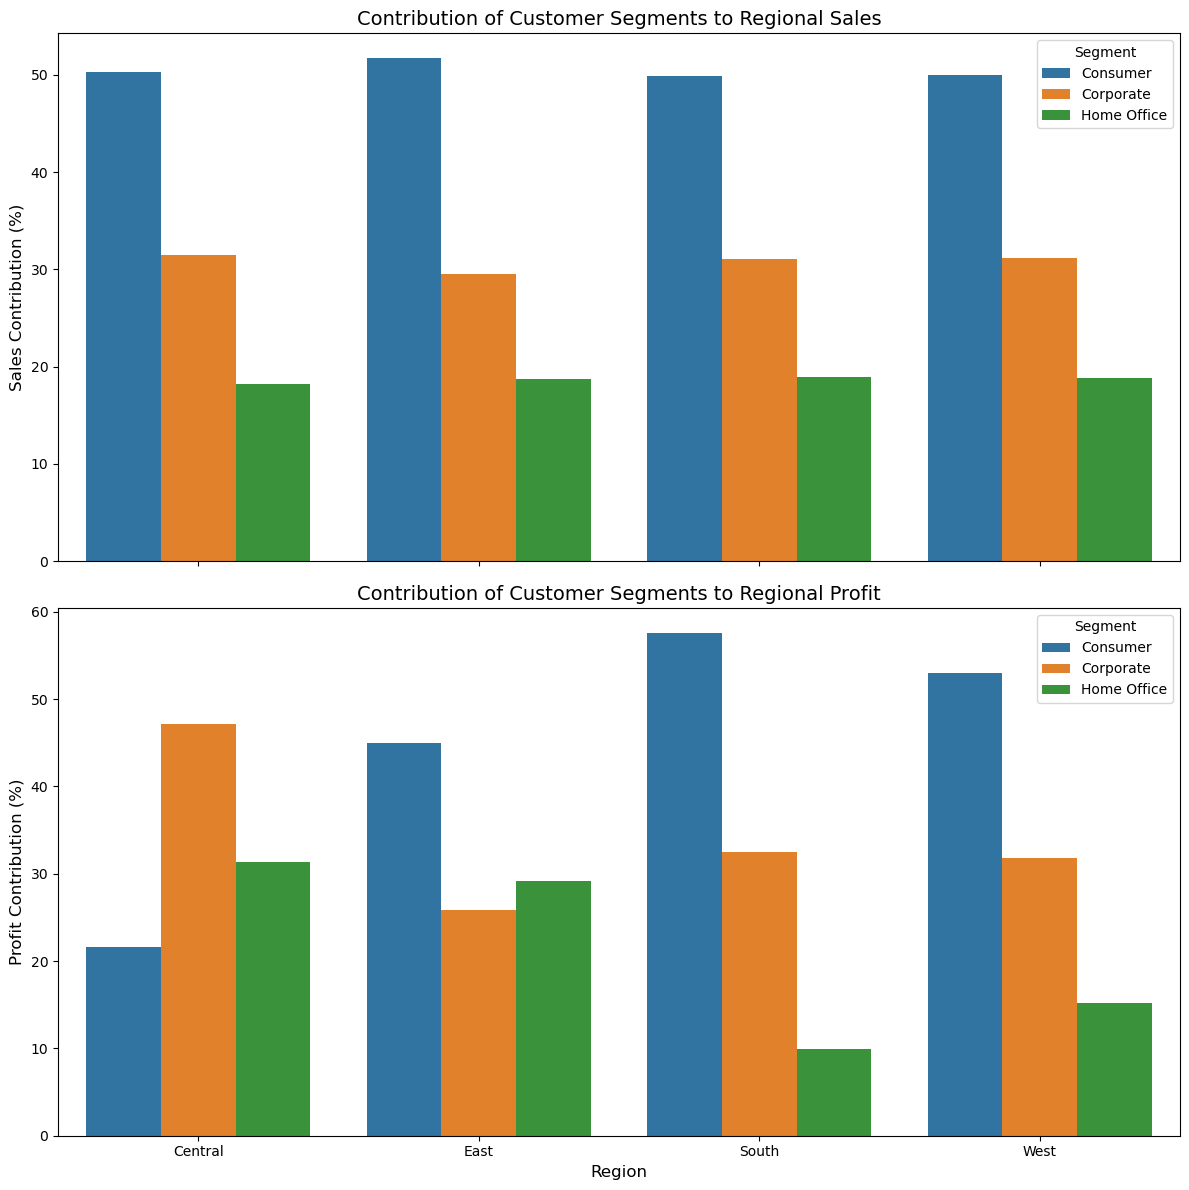

In [50]:
# Aggregating data to calculate the contribution of customer segments to regional sales and profit
segment_region_analysis = superstore_df.groupby(['Region', 'Segment']).agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Adding a percentage contribution column for both sales and profit
total_sales_by_region = segment_region_analysis.groupby('Region')['Total_Sales'].transform('sum')
total_profit_by_region = segment_region_analysis.groupby('Region')['Total_Profit'].transform('sum')

segment_region_analysis['Sales_Contribution (%)'] = (segment_region_analysis['Total_Sales'] / total_sales_by_region) * 100
segment_region_analysis['Profit_Contribution (%)'] = (segment_region_analysis['Total_Profit'] / total_profit_by_region) * 100

fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Sales Contribution
sns.barplot(
    data=segment_region_analysis, 
    x='Region', 
    y='Sales_Contribution (%)', 
    hue='Segment', 
    ax=axes[0]
)
axes[0].set_title('Contribution of Customer Segments to Regional Sales', fontsize=14)
axes[0].set_ylabel('Sales Contribution (%)', fontsize=12)
axes[0].legend(title='Segment')

# Profit Contribution
sns.barplot(
    data=segment_region_analysis, 
    x='Region', 
    y='Profit_Contribution (%)', 
    hue='Segment', 
    ax=axes[1]
)
axes[1].set_title('Contribution of Customer Segments to Regional Profit', fontsize=14)
axes[1].set_xlabel('Region', fontsize=12)
axes[1].set_ylabel('Profit Contribution (%)', fontsize=12)
axes[1].legend(title='Segment')

plt.tight_layout()
plt.show()

## Heatmap Showing The Contribution Of Customer Segments To Regional Sales And Profit


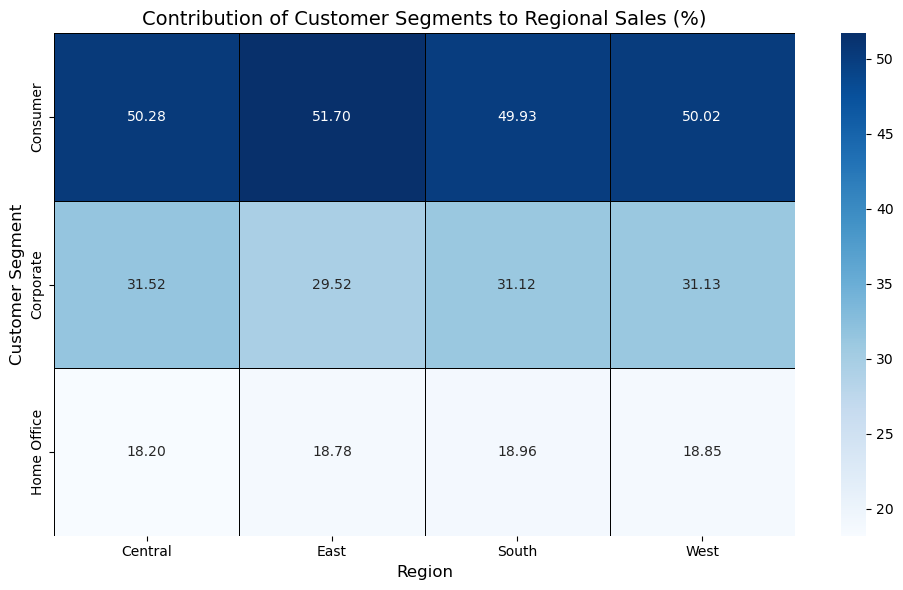

In [51]:
# Preparing data for the heatmap (sales contribution)
heatmap_sales_data = segment_region_analysis.pivot(
    index='Segment', columns='Region', values='Sales_Contribution (%)'
)

# Creating the heatmap for sales contribution
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_sales_data,
    annot=True,
    fmt=".2f",
    cmap='Blues',
    linewidths=0.5,
    linecolor='black'
)
plt.title('Contribution of Customer Segments to Regional Sales (%)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Customer Segment', fontsize=12)
plt.tight_layout()
plt.show()

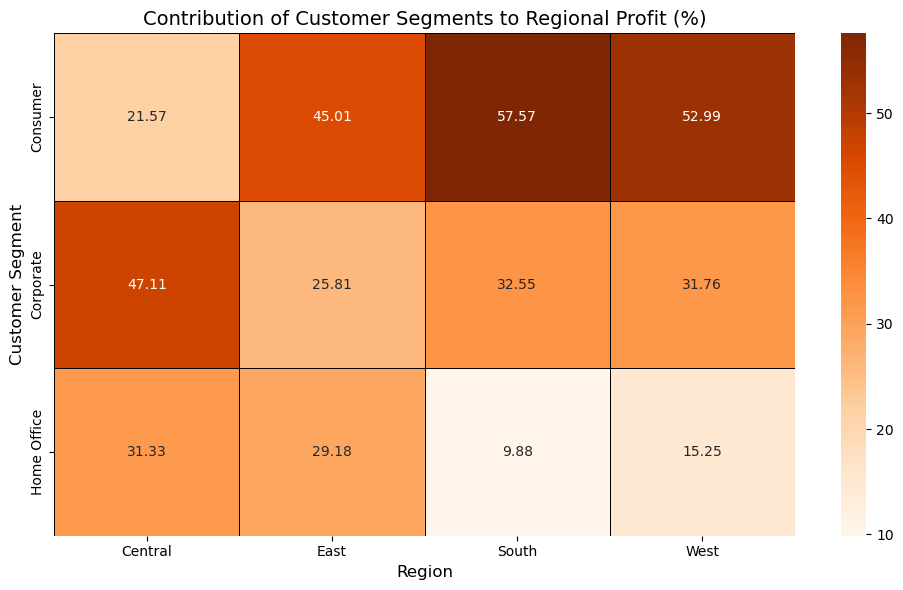

In [52]:
# Preparing data for the heatmap (profit contribution)
heatmap_profit_data = segment_region_analysis.pivot(
    index='Segment', columns='Region', values='Profit_Contribution (%)'
)

# Creating the heatmap for profit contribution
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_profit_data,
    annot=True,
    fmt=".2f",
    cmap='Oranges',
    linewidths=0.5,
    linecolor='black'
)
plt.title('Contribution of Customer Segments to Regional Profit (%)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Customer Segment', fontsize=12)
plt.tight_layout()
plt.show()

##  Catherine's Code


In [53]:
#import os
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In [54]:
#define the file path
superstore = Path('superstore_data.csv')

In [55]:
#to read csv file
# Or use 'latin1' => file contains characters that cannot be decoded using the default utf-8 encoding
superstore_df = pd.read_csv(superstore, encoding='ISO-8859-1')  
superstore_df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [56]:
#to convert the order date and ship date columns to datetime

from datetime import datetime as dt

#convert to datetime
superstore_df['Order Date'] = pd.to_datetime(superstore_df['Order Date'])
superstore_df['Ship Date'] = pd.to_datetime(superstore_df['Ship Date'])

superstore_df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [57]:
#make sure the code work and data type change
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [58]:
#Category with most profit, sales, quantity 
unique_category = superstore_df['Category'].unique()
print(unique_category)

['Furniture' 'Office Supplies' 'Technology']


In [59]:
#Subcategory with most profit, sales, quantity 
unique_subcat = superstore_df['Sub-Category'].unique()
print(unique_subcat)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [60]:
#total profits&sales by sub-category
#we are gonna group numerical values all together 
subcat_df = superstore_df.groupby('Sub-Category').sum(numeric_only= True)
subcat_df.head()
#can reset index if you want but prob not needed, will rerun and comment out
subcat_df.reset_index(inplace = True)
subcat_df.head()

Sub-Category   Row ID  Postal Code        Sales  Quantity  Discount  \
0  Accessories  3928080     44468434  167380.3180      2976     60.80   
1   Appliances  2407754     25250538  107532.1610      1729     77.60   
2          Art  3920109     43329658   27118.7920      3000     59.60   
3      Binders  7633935     83626398  203412.7330      5974    567.00   
4    Bookcases  1156535     12771539  114879.9963       868     48.14   

       Profit  
0  41936.6357  
1  18138.0054  
2   6527.7870  
3  30221.7633  
4  -3472.5560

In [63]:
#create a group by function to make it simipler for future calcuations 
def group_data(column):
    df_group = superstore_df.groupby(column).sum(numeric_only= True)
    df_group.reset_index(inplace =True)
    return df_group
group_data('Category')

Category    Row ID  Postal Code        Sales  Quantity  Discount  \
0        Furniture  10693326    118196026  741999.7953      8028    368.89   
1  Office Supplies  30010535    330772872  719047.0320     22906    947.80   
2       Technology   9241154    102603754  836154.0330      6939    244.40   

        Profit  
0   18451.2728  
1  122490.8008  
2  145454.9481

In [64]:
superstore_df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [65]:
subcat_grouped = group_data('Sub-Category')
subcat_grouped.head()

Sub-Category   Row ID  Postal Code        Sales  Quantity  Discount  \
0  Accessories  3928080     44468434  167380.3180      2976     60.80   
1   Appliances  2407754     25250538  107532.1610      1729     77.60   
2          Art  3920109     43329658   27118.7920      3000     59.60   
3      Binders  7633935     83626398  203412.7330      5974    567.00   
4    Bookcases  1156535     12771539  114879.9963       868     48.14   

       Profit  
0  41936.6357  
1  18138.0054  
2   6527.7870  
3  30221.7633  
4  -3472.5560

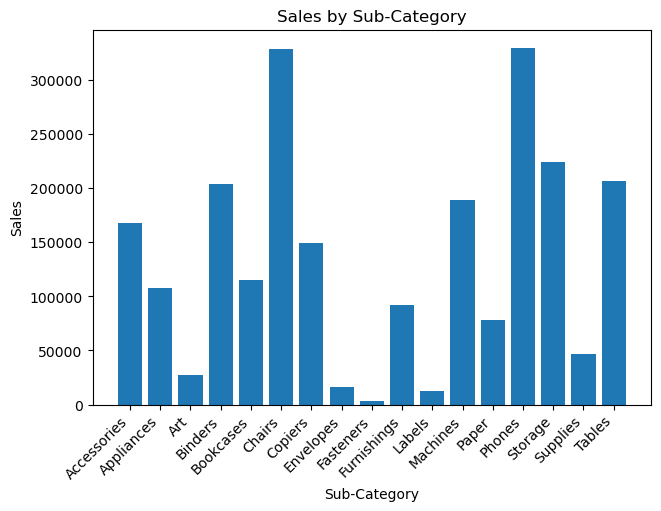

In [66]:

plt.title("Sales by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.bar(subcat_grouped['Sub-Category'], subcat_grouped['Sales'], align ="center")
plt.show()

In [67]:
cat_grouped = group_data('Category')
cat_grouped.head()

Category    Row ID  Postal Code        Sales  Quantity  Discount  \
0        Furniture  10693326    118196026  741999.7953      8028    368.89   
1  Office Supplies  30010535    330772872  719047.0320     22906    947.80   
2       Technology   9241154    102603754  836154.0330      6939    244.40   

        Profit  
0   18451.2728  
1  122490.8008  
2  145454.9481

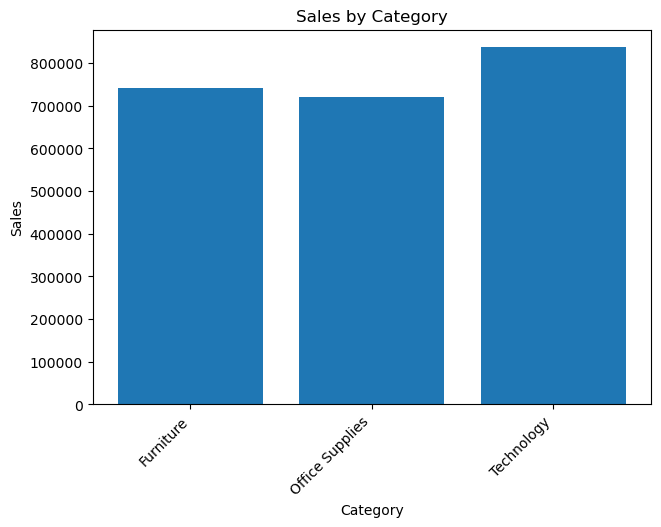

In [68]:
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.bar(cat_grouped['Category'], cat_grouped['Sales'], align ="center")
plt.show()

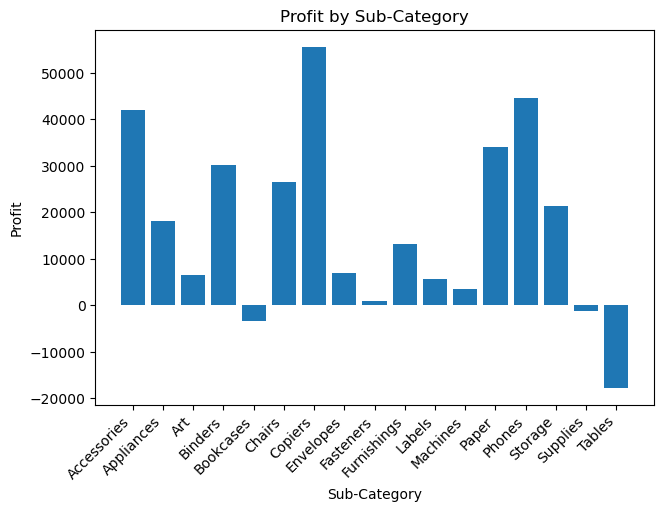

In [69]:
plt.title("Profit by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.bar(subcat_grouped['Sub-Category'], subcat_grouped['Profit'], align ="center")
plt.show()

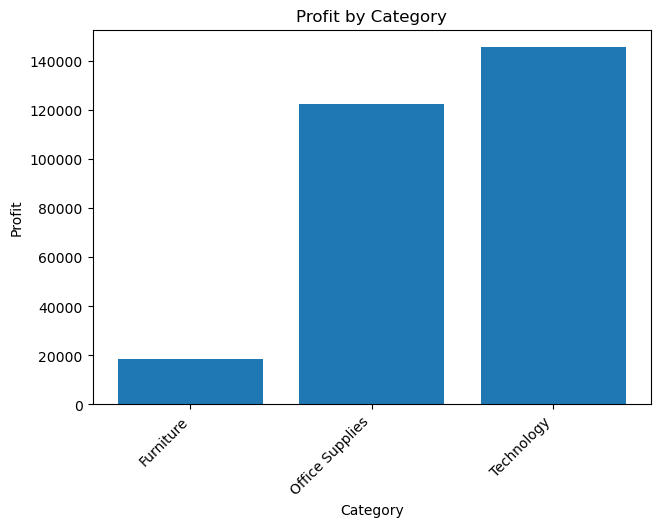

In [70]:
plt.title("Profit by Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.bar(cat_grouped['Category'], cat_grouped['Profit'], align ="center")
plt.show()

In [71]:
#per year pie charts for most popular items 2014
start2014 = '2014-01-01'
end2014 = '2014-12-31'
date_range2014 =pd.date_range(start = start2014, end = end2014)

df_2014 = superstore_df[(superstore_df['Ship Date'] >= start2014) & (superstore_df['Ship Date'] <= end2014)]
df_2014.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
5       6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
6       7  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
7       8  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
8       9  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
9      10  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   

     Customer Name   Segment        Country         City  ... Postal Code  \
5  Brosina Hoffman  Consumer  United States  Los Angeles  ...       90032   
6  Brosina Hoffman  Consumer  United States  Los Angeles  ...       90032   
7  Brosina Hoffman  Consumer  United States  Los Angeles  ...       90032   
8  Brosina Hoffman  Consumer  United States  Los Angeles  ...       90032   
9  Brosina Hoffman  Consumer  United States  Los Angeles  ...       90032   

   Region       Product ID         Category Sub-Category  \
5    West  FUR-FU-10001487        Furniture  Furnishings   
6    West  OFF-AR-10002833  Office Supplies          Art   
7    West  TEC-PH-10002275       Technology       Phones   
8    West  OFF-BI-10003910  Office Supplies      Binders   
9    West  OFF-AP-10002892  Office Supplies   Appliances   

                                        Product Name    Sales  Quantity  \
5  Eldon Expressions Wood and Plastic Desk Access...   48.860         7   
6                                         Newell 322    7.280         4   
7                     Mitel 5320 IP Phone VoIP phone  907.152         6   
8  DXL Angle-View Binders with Locking Rings by S...   18.504         3   
9                   Belkin F5C206VTEL 6 Outlet Surge  114.900         5   

   Discount   Profit  
5       0.0  14.1694  
6       0.0   1.9656  
7       0.2  90.7152  
8       0.2   5.7825  
9       0.0  34.4700  

[5 rows x 21 columns]

In [72]:
#aggregate by category for 2014
cat2014 = group_data(df_2014['Category'])
print(cat2014)

          Category   Row ID  Postal Code        Sales  Quantity  Discount  \
0        Furniture  1983195     23716086  153528.7571      1577     74.46   
1  Office Supplies  5997294     66886765  146256.2210      4456    187.60   
2       Technology  1629909     19964963  170598.2150      1332     46.50   

       Profit  
0   5218.0549  
1  21967.9198  
2  20106.7508  


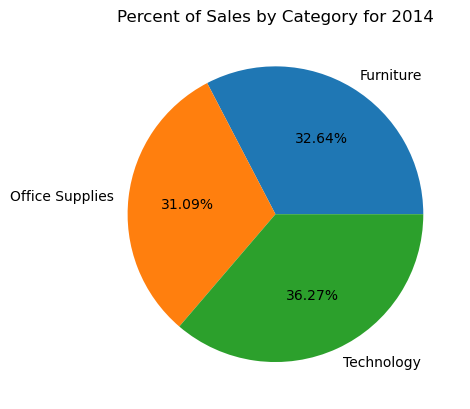

In [73]:
#pie chart for percent of sales by category for 2014
plt.title("Percent of Sales by Category for 2014")
plt.pie(cat2014['Sales'], labels = cat2014['Category'], autopct = '%.2f%%')
plt.show()

In [74]:
#per year pie charts for most popular items 2015
start2015 = '2015-01-01'
end2015 = '2015-12-31'
date_range2015 =pd.date_range(start = start2015, end = end2015)

df_2015 = superstore_df[(superstore_df['Ship Date'] >= start2015) & (superstore_df['Ship Date'] <= end2015)]
df_2015.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
3        4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4        5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
14      15  US-2015-118983 2015-11-22 2015-11-26  Standard Class    HP-14815   
15      16  US-2015-118983 2015-11-22 2015-11-26  Standard Class    HP-14815   
24      25  CA-2015-106320 2015-09-25 2015-09-30  Standard Class    EB-13870   

     Customer Name      Segment        Country             City  ...  \
3   Sean O'Donnell     Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell     Consumer  United States  Fort Lauderdale  ...   
14   Harold Pawlan  Home Office  United States       Fort Worth  ...   
15   Harold Pawlan  Home Office  United States       Fort Worth  ...   
24     Emily Burns     Consumer  United States             Orem  ...   

   Postal Code   Region       Product ID         Category Sub-Category  \
3        33311    South  FUR-TA-10000577        Furniture       Tables   
4        33311    South  OFF-ST-10000760  Office Supplies      Storage   
14       76106  Central  OFF-AP-10002311  Office Supplies   Appliances   
15       76106  Central  OFF-BI-10000756  Office Supplies      Binders   
24       84057     West  FUR-TA-10000577        Furniture       Tables   

                                         Product Name      Sales  Quantity  \
3       Bretford CR4500 Series Slim Rectangular Table   957.5775         5   
4                      Eldon Fold 'N Roll Cart System    22.3680         2   
14  Holmes Replacement Filter for HEPA Air Cleaner...    68.8100         5   
15   Storex DuraTech Recycled Plastic Frosted Binders     2.5440         3   
24      Bretford CR4500 Series Slim Rectangular Table  1044.6300         3   

    Discount    Profit  
3       0.45 -383.0310  
4       0.20    2.5164  
14      0.80 -123.8580  
15      0.80   -3.8160  
24      0.00  240.2649  

[5 rows x 21 columns]

In [75]:
#aggregate by category for 2015
cat2015 = group_data(df_2015['Category'])
print(cat2015)

          Category   Row ID  Postal Code       Sales  Quantity  Discount  \
0        Furniture  2251890     25236068  174006.593      1815     77.89   
1  Office Supplies  6247770     65103380  140885.502      4759    199.60   
2       Technology  2102482     22131947  164550.407      1535     53.50   

       Profit  
0   3245.3851  
1  25088.8687  
2  34547.2761  


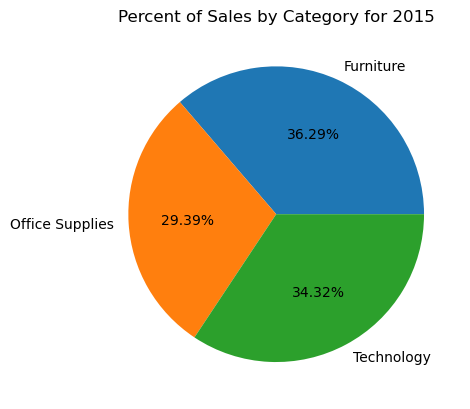

In [76]:
#pie chart for percent of sales by category for 2015
plt.title("Percent of Sales by Category for 2015")
plt.pie(cat2015['Sales'], labels = cat2015['Category'], autopct = '%.2f%%')
plt.show()

In [77]:
#per year pie charts for most popular items 2016
start2016 = '2016-01-01'
end2016 = '2016-12-31'
date_range2016 =pd.date_range(start = start2016, end = end2016)

df_2016 = superstore_df[(superstore_df['Ship Date'] >= start2016) & (superstore_df['Ship Date'] <= end2016)]
df_2016.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0        1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1        2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2        3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
13      14  CA-2016-161389 2016-12-05 2016-12-10  Standard Class    IM-15070   
21      22  CA-2016-137330 2016-12-09 2016-12-13  Standard Class    KB-16585   

      Customer Name    Segment        Country         City  ... Postal Code  \
0       Claire Gute   Consumer  United States    Henderson  ...       42420   
1       Claire Gute   Consumer  United States    Henderson  ...       42420   
2   Darrin Van Huff  Corporate  United States  Los Angeles  ...       90036   
13     Irene Maddox   Consumer  United States      Seattle  ...       98103   
21        Ken Black  Corporate  United States      Fremont  ...       68025   

     Region       Product ID         Category Sub-Category  \
0     South  FUR-BO-10001798        Furniture    Bookcases   
1     South  FUR-CH-10000454        Furniture       Chairs   
2      West  OFF-LA-10000240  Office Supplies       Labels   
13     West  OFF-BI-10003656  Office Supplies      Binders   
21  Central  OFF-AR-10000246  Office Supplies          Art   

                                         Product Name    Sales  Quantity  \
0                   Bush Somerset Collection Bookcase  261.960         2   
1   Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.940         3   
2   Self-Adhesive Address Labels for Typewriters b...   14.620         2   
13        Fellowes PB200 Plastic Comb Binding Machine  407.976         3   
21                                         Newell 318   19.460         7   

    Discount    Profit  
0        0.0   41.9136  
1        0.0  219.5820  
2        0.0    6.8714  
13       0.2  132.5922  
21       0.0    5.0596  

[5 rows x 21 columns]

In [78]:
#aggregate by category for 2016
cat2016 = group_data(df_2016['Category'])
print(cat2016)


          Category   Row ID  Postal Code       Sales  Quantity  Discount  \
0        Furniture  2887670     30780730  197763.907      2177     99.02   
1  Office Supplies  7526070     84274766  185005.512      5947    235.40   
2       Technology  2288925     25415411  228556.334      1699     61.80   

       Profit  
0   6872.9005  
1  35600.7818  
2  40467.4194  


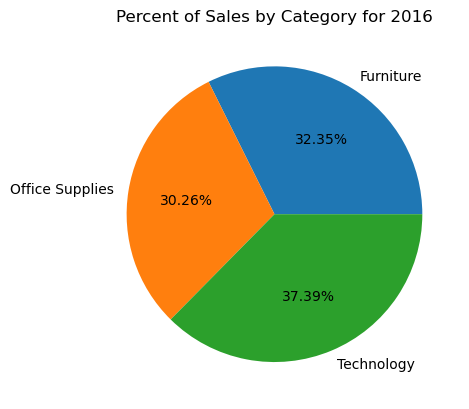

In [79]:
#pie chart for percent of sales by category for 2016
plt.title("Percent of Sales by Category for 2016")
plt.pie(cat2016['Sales'], labels = cat2016['Category'], autopct = '%.2f%%')
plt.show()


In [80]:
#per year pie charts for most popular items 2017
start2017 = '2017-01-01'
end2017 = '2017-12-31'
date_range2017 =pd.date_range(start = start2017, end = end2017)

df_2017 = superstore_df[(superstore_df['Ship Date'] >= start2017) & (superstore_df['Ship Date'] <= end2017)]
df_2017.head()


Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
12      13  CA-2017-114412 2017-04-15 2017-04-20  Standard Class    AA-10480   
23      24  US-2017-156909 2017-07-16 2017-07-18    Second Class    SF-20065   
34      35  CA-2017-107727 2017-10-19 2017-10-23    Second Class    MA-17560   
41      42  CA-2017-120999 2017-09-10 2017-09-15  Standard Class    LC-16930   
43      44  CA-2017-139619 2017-09-19 2017-09-23  Standard Class    ES-14080   

      Customer Name      Segment        Country          City  ...  \
12     Andrew Allen     Consumer  United States       Concord  ...   
23  Sandra Flanagan     Consumer  United States  Philadelphia  ...   
34     Matt Abelman  Home Office  United States       Houston  ...   
41   Linda Cazamias    Corporate  United States    Naperville  ...   
43       Erin Smith    Corporate  United States     Melbourne  ...   

   Postal Code   Region       Product ID         Category Sub-Category  \
12       28027    South  OFF-PA-10002365  Office Supplies        Paper   
23       19140     East  FUR-CH-10002774        Furniture       Chairs   
34       77095  Central  OFF-PA-10000249  Office Supplies        Paper   
41       60540  Central  TEC-PH-10004093       Technology       Phones   
43       32935    South  OFF-ST-10003282  Office Supplies      Storage   

                                         Product Name    Sales  Quantity  \
12                                         Xerox 1967   15.552         3   
23                 Global Deluxe Stacking Chair, Gray   71.372         2   
34                                  Easy-staple paper   29.472         3   
41                                 Panasonic Kx-TS550  147.168         4   
43  Advantus 10-Drawer Portable Organizer, Chrome ...   95.616         2   

    Discount   Profit  
12       0.2   5.4432  
23       0.3  -1.0196  
34       0.2   9.9468  
41       0.2  16.5564  
43       0.2   9.5616  

[5 rows x 21 columns]

In [81]:
#aggregate by category for 2017
cat2017 = group_data(df_2017['Category'])
print(cat2017)


          Category    Row ID  Postal Code        Sales  Quantity  Discount  \
0        Furniture   3510440     37690033  213836.1314      2418     115.3   
1  Office Supplies  10111084    112853343  245012.6630      7647     320.0   
2       Technology   3216477     34981351  272040.9210      2360      82.4   

       Profit  
0   2625.7887  
1  39417.0003  
2  50304.0862  


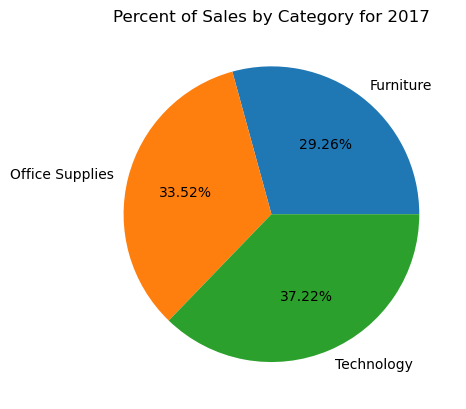

In [82]:
#pie chart for percent of sales by category for 2017
plt.title("Percent of Sales by Category for 2017")
plt.pie(cat2017['Sales'], labels = cat2017['Category'], autopct = '%.2f%%')
plt.show()


In [83]:
#per year pie charts for most popular items 2018
start2018 = '2018-01-01'
end2018 = '2018-12-31'
date_range2018 =pd.date_range(start = start2018, end = end2018)

df_2018 = superstore_df[(superstore_df['Ship Date'] >= start2018) & (superstore_df['Ship Date'] <= end2018)]
df_2018.head()


Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
270     271  CA-2017-163979 2017-12-28 2018-01-02    Second Class    KH-16690   
570     571  CA-2017-164826 2017-12-28 2018-01-04  Standard Class    JF-15415   
571     572  CA-2017-164826 2017-12-28 2018-01-04  Standard Class    JF-15415   
572     573  CA-2017-164826 2017-12-28 2018-01-04  Standard Class    JF-15415   
573     574  CA-2017-164826 2017-12-28 2018-01-04  Standard Class    JF-15415   

         Customer Name    Segment        Country           City  ...  \
270   Kristen Hastings  Corporate  United States  San Francisco  ...   
570  Jennifer Ferguson   Consumer  United States  New York City  ...   
571  Jennifer Ferguson   Consumer  United States  New York City  ...   
572  Jennifer Ferguson   Consumer  United States  New York City  ...   
573  Jennifer Ferguson   Consumer  United States  New York City  ...   

    Postal Code  Region       Product ID         Category Sub-Category  \
270       94110    West  OFF-ST-10003208  Office Supplies      Storage   
570       10024    East  OFF-LA-10001297  Office Supplies       Labels   
571       10024    East  OFF-FA-10000585  Office Supplies    Fasteners   
572       10024    East  OFF-BI-10001922  Office Supplies      Binders   
573       10024    East  TEC-PH-10000347       Technology       Phones   

                                          Product Name    Sales  Quantity  \
270                 Adjustable Depth Letter/Legal Cart  725.840         4   
570                                          Avery 473   72.450         7   
571                   OIC Bulk Pack Metal Binder Clips   13.960         4   
572                            Storex Dura Pro Binders   33.264         7   
573  Cush Cases Heavy Duty Rugged Cover Case for Sa...   14.850         3   

     Discount    Profit  
270       0.0  210.4936  
570       0.0   34.7760  
571       0.0    6.4216  
572       0.2   11.2266  
573       0.0    4.0095  

[5 rows x 21 columns]

In [84]:
#aggregate by category for 2018
cat2018 = group_data(df_2018['Category'])
print(cat2018)


          Category  Row ID  Postal Code      Sales  Quantity  Discount  \
0        Furniture   60131       773109  2864.4068        41      2.22   
1  Office Supplies  128317      1654618  1887.1340        97      5.20   
2       Technology    3361       110082   408.1560        13      0.20   

     Profit  
0  489.1436  
1  416.2302  
2   29.4156  


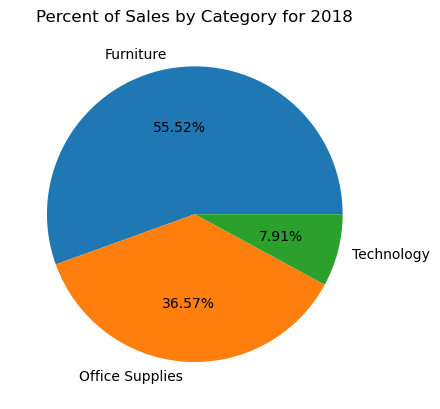

In [85]:
#pie chart for percent of sales by category for 2018
plt.title("Percent of Sales by Category for 2018")
plt.pie(cat2018['Sales'], labels = cat2018['Category'], autopct = '%.2f%%')
plt.show()


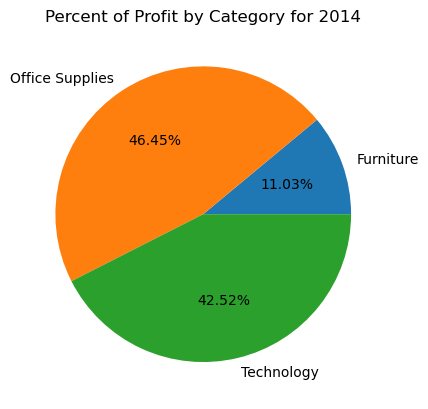

In [86]:
#pie chart for profit by category for 2014
plt.title("Percent of Profit by Category for 2014")
plt.pie(cat2014['Profit'], labels = cat2014['Category'], autopct = '%.2f%%')
plt.show()

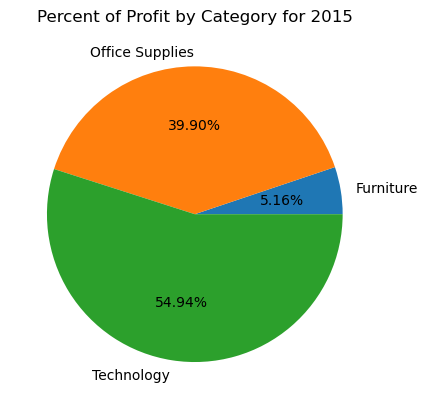

In [87]:
#pie chart for profit by category for 2015
plt.title("Percent of Profit by Category for 2015")
plt.pie(cat2015['Profit'], labels = cat2015['Category'], autopct = '%.2f%%')
plt.show()

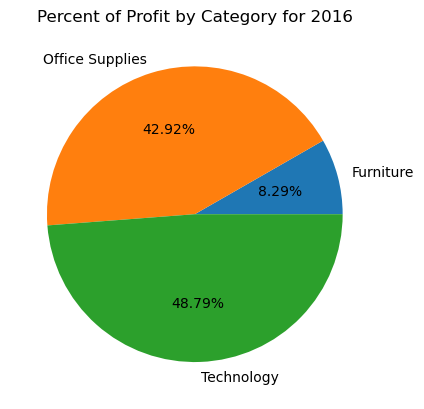

In [88]:
#pie chart for profit by category for 2016
plt.title("Percent of Profit by Category for 2016")
plt.pie(cat2016['Profit'], labels = cat2016['Category'], autopct = '%.2f%%')
plt.show()


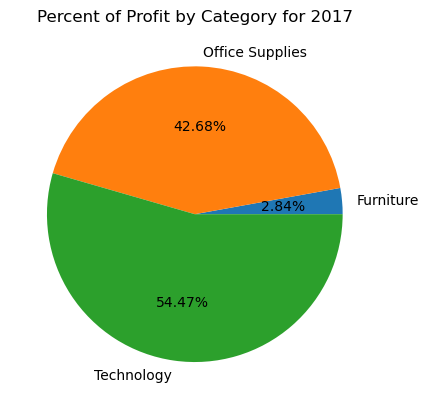

In [89]:
#pie chart for profit by category for 2017
plt.title("Percent of Profit by Category for 2017")
plt.pie(cat2017['Profit'], labels = cat2017['Category'], autopct = '%.2f%%')
plt.show()


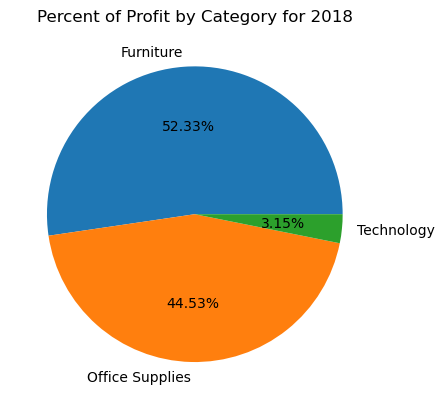

In [90]:
#pie chart for profit by category for 2018
plt.title("Percent of Profit by Category for 2018")
plt.pie(cat2018['Profit'], labels = cat2018['Category'], autopct = '%.2f%%')
plt.show()

In [91]:
#create the bins for the analysis to create the bargraph that will analyze the profits within the discount ranges
discount_bins = [-0.01, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
discount_labels = ['No Discount', '0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '>50%']
superstore_df['DiscountRange'] = pd.cut(superstore_df['Discount'], bins=discount_bins, labels=discount_labels)
discount_analysis = superstore_df.groupby('DiscountRange', observed = True).agg(Frequency=('Sales', 'count'),  TotalSales=('Sales', 'sum')).reset_index()
print(discount_analysis)

  DiscountRange  Frequency    TotalSales
0   No Discount       4798  1.087908e+06
1         0-10%         94  5.436935e+04
2        10-20%       3709  7.921529e+05
3        20-30%        227  1.032267e+05
4        30-40%        233  1.309112e+05
5        40-50%         77  6.440351e+04
6          >50%        856  6.422874e+04


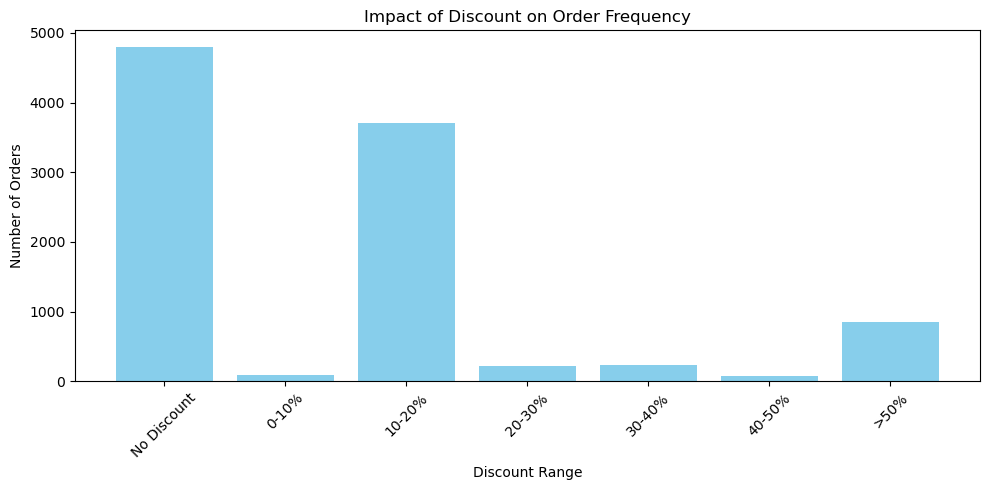

In [92]:
#plotting the impact of discount on order frequency
plt.figure(figsize=(10, 5))
plt.bar(discount_analysis['DiscountRange'], discount_analysis['Frequency'], color='skyblue')
plt.title('Impact of Discount on Order Frequency')
plt.xlabel('Discount Range')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [93]:
#making the total sales data proportionate
total_orders = discount_analysis['Frequency'].sum()
total_sales = discount_analysis['TotalSales'].sum()
discount_analysis['RelativeOrders'] = discount_analysis['Frequency'] / total_orders
discount_analysis['RelativeSales'] = discount_analysis['TotalSales'] / total_sales
total_orders = discount_analysis['Frequency'].sum()
total_sales = discount_analysis['TotalSales'].sum()
discount_analysis['RelativeOrders'] = discount_analysis['Frequency'] / total_orders
discount_analysis['RelativeSales'] = discount_analysis['TotalSales'] / total_sales
discount_analysis['SalesPerOrder'] = discount_analysis['TotalSales'] / discount_analysis['Frequency']


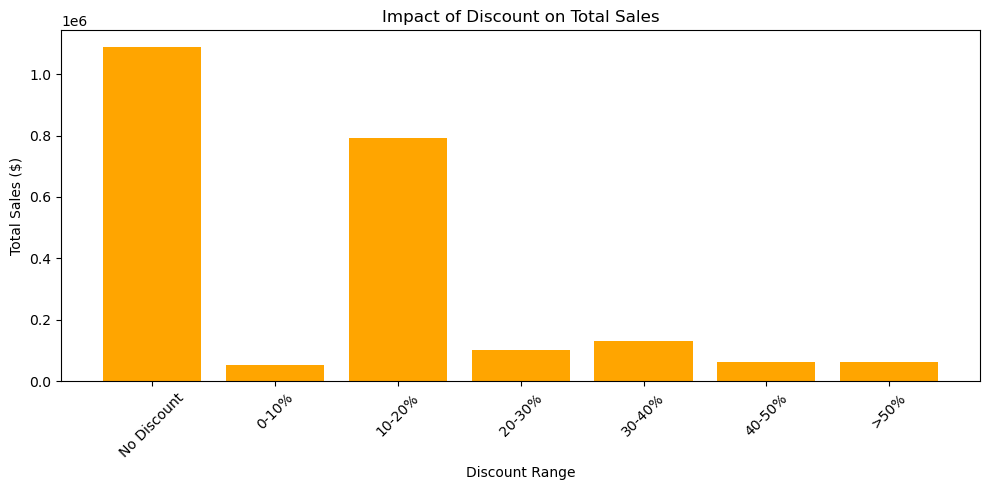

In [94]:
#plotting the impact of discount on total sales
plt.figure(figsize=(10, 5))
plt.bar(discount_analysis['DiscountRange'], discount_analysis['TotalSales'], color='orange')
plt.title('Impact of Discount on Total Sales')
plt.xlabel('Discount Range')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

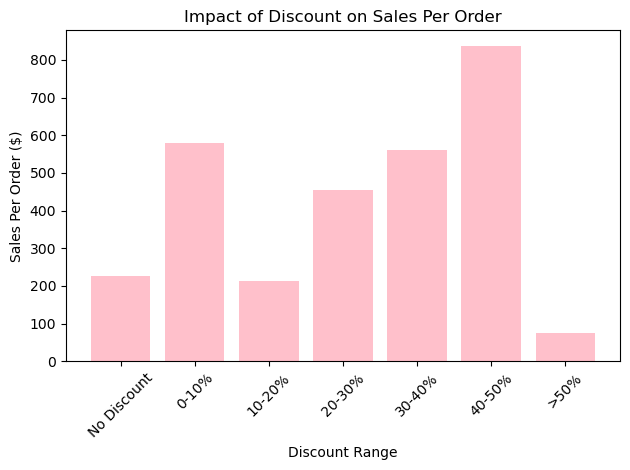

In [95]:
#plot the impact of of discount on sales
plt.bar(discount_analysis['DiscountRange'], discount_analysis['SalesPerOrder'], color='pink')
plt.title('Impact of Discount on Sales Per Order')
plt.xlabel('Discount Range')
plt.ylabel('Sales Per Order ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [96]:
#making the profit data proportionate
discount_profit_analysis = superstore_df.groupby('DiscountRange', observed = True).agg(Profit_Frequency=('Profit', 'count'),  TotalProfit=('Profit', 'sum')).reset_index()
total_orders_p = discount_profit_analysis['Profit_Frequency'].sum()
total_profits = discount_profit_analysis['TotalProfit'].sum()
discount_profit_analysis['RelativeOrders_P'] = discount_profit_analysis['Profit_Frequency'] / total_orders_p
discount_profit_analysis['RelativeProfit'] = discount_profit_analysis['TotalProfit'] / total_profits
total_orders_p = discount_profit_analysis['Profit_Frequency'].sum()
total_profits = discount_profit_analysis['TotalProfit'].sum()
discount_profit_analysis['RelativeOrders_P'] = discount_profit_analysis['Profit_Frequency'] / total_orders_p
discount_profit_analysis['RelativeProfit'] = discount_profit_analysis['TotalProfit'] / total_profits
discount_profit_analysis['ProfitPerOrder'] = discount_profit_analysis['TotalProfit'] / discount_profit_analysis['Profit_Frequency']

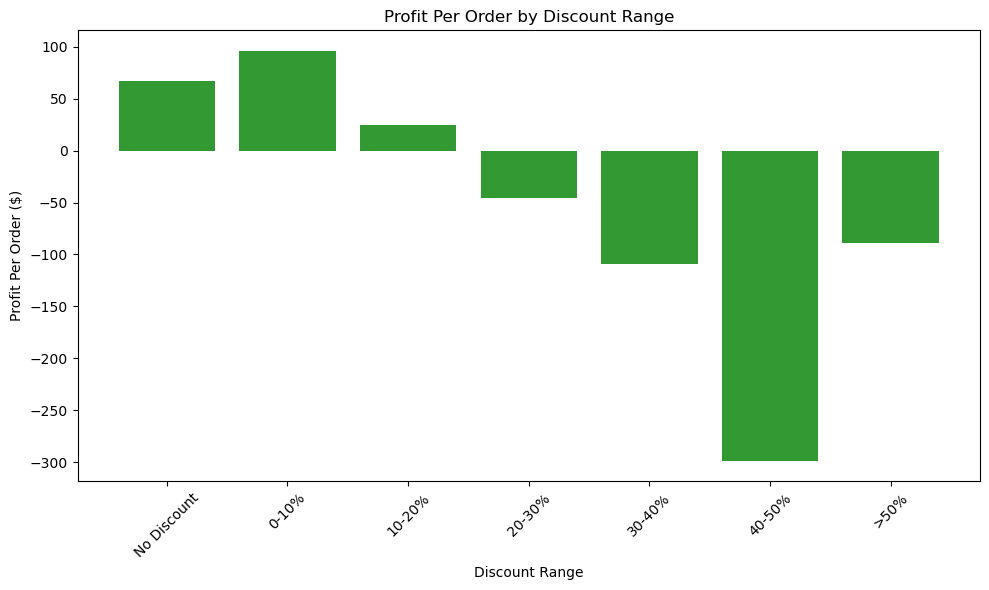

In [97]:
plt.figure(figsize=(10, 6))
plt.bar(discount_profit_analysis['DiscountRange'], discount_profit_analysis['ProfitPerOrder'], color='green', alpha=0.8)
plt.title('Profit Per Order by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Profit Per Order ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

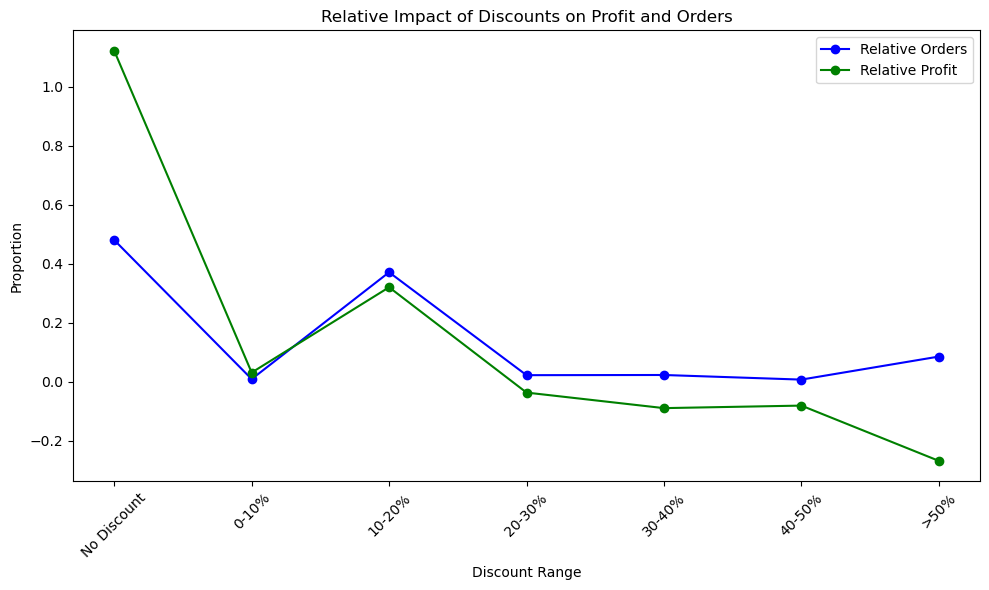

In [98]:
# line chart comparison between relative orders vs profit
plt.figure(figsize=(10, 6))
plt.plot(discount_profit_analysis['DiscountRange'], discount_profit_analysis['RelativeOrders_P'], marker='o', label='Relative Orders', color='blue')
plt.plot(discount_profit_analysis['DiscountRange'], discount_profit_analysis['RelativeProfit'], marker='o', label='Relative Profit', color='green')
plt.title('Relative Impact of Discounts on Profit and Orders')
plt.xlabel('Discount Range')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()